In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm, skew, kurtosis, zscore, shapiro

import matplotlib.pyplot as plt
import seaborn as sns

#Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#change directory for your path
os.chdir('E:\\OneDrive\\Documents\\GitHub\\eHealthEquity\\Research\\Data Source')

# Import
Data import and columns for analysis

In [3]:
df = pd.read_csv('./final_merge.csv')

In [4]:
df.head()

county   state  ruca  brfss_access2_ageadjprv  \
0  Aleutians East  Alaska  10.0                     16.9   
1  Aleutians West  Alaska  10.0                     13.7   
2       Anchorage  Alaska   1.0                     10.4   
3          Bethel  Alaska   9.0                     19.2   
4     Bristol Bay  Alaska  10.0                     10.3   

   brfss_checkup_ageadjprv  brfss_csmoking_ageadjprv  \
0                     60.7                      18.6   
1                     61.6                      15.5   
2                     62.9                      14.9   
3                     62.6                      35.4   
4                     61.4                      18.7   

   brfss_depression_ageadjprv  brfss_diabetes_ageadjprv  \
0                        13.1                      12.6   
1                        13.4                      10.9   
2                        19.5                       7.8   
3                        21.2                      15.9   
4                        18.8                       8.6   

   brfss_ghlth_ageadjprv  brfss_mhlth_ageadjprv  brfss_obesity_ageadjprv  \
0                   19.1                   12.9                     31.3   
1                   15.3                   12.2                     30.3   
2                   13.5                   14.5                     32.9   
3                   30.0                   21.4                     43.1   
4                   14.4                   15.4                     35.6   

   pct_ed_lt9  pct_ed_9_12  pct_ed_hs  pct_ed_sc  pct_ed_asc  pct_ed_b  \
0         6.1          9.2       41.6       21.9         5.4      10.6   
1         4.8          4.1       43.4       25.1         5.8      14.4   
2         2.2          3.7       23.7       25.0         8.6      22.8   
3         6.9         11.2       46.6       18.1         4.5       7.3   
4         3.0          2.3       30.2       33.7         8.7      16.8   

   pct_ed_gr  pct_age_gte65  pct_race_white  pct_race_black  pct_race_aian  \
0        5.4           11.7            14.6             2.1           44.1   
1        2.4            7.0            24.5             3.5           10.5   
2       14.0           11.5            60.3             5.4            7.2   
3        5.5            7.5             9.6             0.9           84.5   
4        5.3           13.1            44.8             0.6           33.2   

   pct_race_asian  pct_race_nhopi  pct_race_other  pct_eth_hisp  pct_sex_male  \
0            20.9             0.3             6.5          10.5          59.1   
1            45.8             1.7             5.5           9.7          57.0   
2             9.7             2.9             2.7           9.5          51.2   
3             1.4             0.2             0.2           2.1          52.5   
4             4.1             1.5             2.9          12.8          56.5   

   pct_sex_female  pct_occ_unemp  pct_occ_mgt  pct_occ_svc  pct_occ_sales  \
0            40.9            3.5         23.9         13.2           11.7   
1            43.0            3.1         16.1         15.5           23.3   
2            48.8            3.6         41.6         18.0           21.0   
3            47.5           11.3         34.4         20.5           24.4   
4            43.5            1.6         37.2         11.5           17.8   

   pct_occ_nat_res  pct_occ_prod  pct_hlth_unins  pct_ses_pov  pct_tp_veh_0  \
0             12.7          38.6            40.0         13.4          24.0   
1             10.9          34.1            19.6          8.3          14.2   
2              8.3          11.1            10.5          9.1           5.5   
3              7.4          13.3            15.1         28.5          60.1   
4             17.6          15.8            17.0          3.5           9.8   

   pct_tp_veh_1  pct_tp_veh_2  pct_tp_veh_3  pct_dg_bb_int  bb_int_struct  \
0          37.2          28.0          10.8           57.5         0.0000   
1       

In [5]:
df.dtypes

county                         object
state                          object
ruca                          float64
brfss_access2_ageadjprv       float64
brfss_checkup_ageadjprv       float64
brfss_csmoking_ageadjprv      float64
brfss_depression_ageadjprv    float64
brfss_diabetes_ageadjprv      float64
brfss_ghlth_ageadjprv         float64
brfss_mhlth_ageadjprv         float64
brfss_obesity_ageadjprv       float64
pct_ed_lt9                    float64
pct_ed_9_12                   float64
pct_ed_hs                     float64
pct_ed_sc                     float64
pct_ed_asc                    float64
pct_ed_b                      float64
pct_ed_gr                     float64
pct_age_gte65                 float64
pct_race_white                float64
pct_race_black                float64
pct_race_aian                 float64
pct_race_asian                float64
pct_race_nhopi                float64
pct_race_other                float64
pct_eth_hisp                  float64
pct_sex_male

# Exploratory Data Analysis
1. Descriptive Statistics
2. Visualization
3. Preprocessing
4. Transformation

In [6]:
print("Number of Counties and Total Features", df.shape)

Number of Counties and Total Features (3076, 46)


## Missing/Null Data

In [7]:
nulls = df.isnull().sum()
nulls[nulls > 0]

ruca    3
dtype: int64

## Descriptive Statistics

In [8]:
stats_df = df.describe().loc[['mean', 'std', '50%', 'min', 'max']]
stats_df.T

mean        std   50%   min    max
ruca                         5.298405   3.065441   5.0   1.0   10.0
brfss_access2_ageadjprv     12.255072   5.643364  10.6   3.7   47.6
brfss_checkup_ageadjprv     72.326853   4.454351  73.1  54.7   82.5
brfss_csmoking_ageadjprv    18.996651   4.079224  18.7   7.0   43.0
brfss_depression_ageadjprv  23.043531   3.283004  23.1   9.4   33.3
brfss_diabetes_ageadjprv    10.564337   2.259399  10.2   5.6   22.2
brfss_ghlth_ageadjprv       17.718791   4.559390  16.9   8.4   38.0
brfss_mhlth_ageadjprv       17.145156   2.128156  17.1   9.8   24.7
brfss_obesity_ageadjprv     37.418043   4.540905  37.7  17.4   52.5
pct_ed_lt9                   4.423375   3.466144   3.6   0.0   56.3
pct_ed_9_12                  7.591385   3.445418   7.0   0.0   29.1
pct_ed_hs                   33.961476   7.513505  34.2   6.5   55.6
pct_ed_sc                   21.509070   3.913282  21.4   0.0   36.7
pct_ed_asc                   9.503966   2.962101   9.2   0.0   48.1
pct_ed_b                    14.852861   5.824793  13.8   0.0   43.7
pct_ed_gr                    8.157445   4.716196   6.8   0.0   49.1
pct_age_gte65               19.139012   4.629161  18.8   3.1   42.3
pct_race_white              80.539597  17.174231  86.7   3.3  100.0
pct_race_black               8.810631  14.427708   2.1   0.0   87.1
pct_race_aian                1.981860   7.912475   0.3   0.0   94.8
pct_race_asian               1.419376   2.931599   0.6   0.0   45.8
pct_race_nhopi               0.099675   0.537195   0.0   0.0   16.7
pct_race_other               2.432997   3.970023   1.2   0.0   49.1
pct_eth_hisp                 9.680332  14.016686   4.4   0.0   98.2
pct_sex_male                50.340930   2.394282  49.9  43.5   68.9
pct_sex_female              49.659070   2.394282  50.1  31.1   56.5
pct_occ_unemp                2.953966   1.378681   2.8   0.0   20.6
pct_occ_mgt                 33.602146   7.149429  32.6  14.5   71.9
pct_occ_svc                 17.531827   3.733428  17.1   0.0   37.8
pct_occ_sales               19.597464   3.020963  19.8   2.8   35.1
pct_occ_nat_res             12.377113   4.178956  11.9   0.0   45.3
pct_occ_prod                16.892230   5.916364  16.6   1.7   41.2
pct_hlth_unins               9.607217   5.150816   8.4   0.0   44.9
pct_ses_pov                 14.395254   6.147772  13.4   1.2   59.0
pct_tp_veh_0                 6.074675   4.509525   5.4   0.0   88.2
pct_tp_veh_1                29.096554   5.721750  29.2   7.6   77.4
pct_tp_veh_2                36.817880   4.605759  37.1   1.0   69.7
pct_tp_veh_3                28.007997   7.585482  27.6   0.0   65.5
pct_dg_bb_int               80.490637   7.891729  81.7  37.0   97.6
bb_int_struct                0.997124   0.049384   1.0   0.0    1.0
ruca_metro                   0.311443   0.463159   0.0   0.0    1.0
ruca_micro                   0.304941   0.460457   0.0   0.0    1.0
ruca_small_town              0.249025   0.432518   0.0   0.0    1.0
ruca_rural                   0.133615   0.340294   0.0   0.0    1.0

# Key Insight: 
- Population metrics of race and ethnicity do not match Census data. For Example: ACS data (2021) shows 80% of the population is white, 2020 Census data shows 61.6% in 2020. ACS respondents do not perfectly match the population. Census Bureau indicates that updated wording in census questions may have contributed to the difference in race totals. 

## Distribution Analysis

In [9]:
desc_df = pd.DataFrame(columns=['feature', 'mean', 'std', 'skew', 'kurtosis'])
features = df.select_dtypes(include=[np.number]).columns
desc_df['feature'] = features
desc_df['mean'] = df[features].mean().values
desc_df['std'] = df[features].std().values
desc_df['skew'] = df[features].skew().values
desc_df['kurtosis'] = df[features].kurtosis().values

display(desc_df)

feature       mean        std       skew    kurtosis
0                         ruca   5.298405   3.065441   0.060801   -1.283866
1      brfss_access2_ageadjprv  12.255072   5.643364   2.107886    6.633946
2      brfss_checkup_ageadjprv  72.326853   4.454351  -0.768616    0.376859
3     brfss_csmoking_ageadjprv  18.996651   4.079224   0.475503    1.437082
4   brfss_depression_ageadjprv  23.043531   3.283004   0.007092   -0.097380
5     brfss_diabetes_ageadjprv  10.564337   2.259399   1.040793    1.694400
6        brfss_ghlth_ageadjprv  17.718791   4.559390   0.748500    0.465342
7        brfss_mhlth_ageadjprv  17.145156   2.128156   0.084047   -0.161216
8      brfss_obesity_ageadjprv  37.418043   4.540905  -0.606410    1.112206
9                   pct_ed_lt9   4.423375   3.466144   3.690948   29.473258
10                 pct_ed_9_12   7.591385   3.445418   0.949581    1.665073
11                   pct_ed_hs  33.961476   7.513505  -0.281463    0.004476
12                   pct_ed_sc  21.509070   3.913282   0.178639    0.710091
13                  pct_ed_asc   9.503966   2.962101   1.174477    9.827616
14                    pct_ed_b  14.852861   5.824793   0.949917    1.149145
15                   pct_ed_gr   8.157445   4.716196   2.121387    7.329816
16               pct_age_gte65  19.139012   4.629161   0.604075    1.109730
17              pct_race_white  80.539597  17.174231  -1.507400    2.116967
18              pct_race_black   8.810631  14.427708   2.353543    5.537687
19               pct_race_aian   1.981860   7.912475   7.696805   66.657625
20              pct_race_asian   1.419376   2.931599   6.809945   65.940742
21              pct_race_nhopi   0.099675   0.537195  20.418016  505.692662
22              pct_race_other   2.432997   3.970023   4.873062   35.042128
23                pct_eth_hisp   9.680332  14.016686   3.057641   10.737618
24                pct_sex_male  50.340930   2.394282   2.502818   11.418164
25              pct_sex_female  49.659070   2.394282  -2.502818   11.418164
26               pct_occ_unemp   2.953966   1.378681   2.202146   16.620593
27                 pct_occ_mgt  33.602146   7.149429   0.923677    1.730138
28                 pct_occ_svc  17.531827   3.733428   0.848740    2.486729
29               pct_occ_sales  19.597464   3.020963  -0.466503    2.320332
30             pct_occ_nat_res  12.377113   4.178956   1.090219    3.425395
31                pct_occ_prod  16.892230   5.916364   0.398891    0.025931
32              pct_hlth_unins   9.607217   5.150816   1.547306    4.176574
33                 pct_ses_pov  14.395254   6.147772   1.197558    3.057005
34                pct_tp_veh_0   6.074675   4.509525   7.594433   97.459344
35                pct_tp_veh_1  29.096554   5.721750   0.221071    2.214712
36                pct_tp_veh_2  36.817880   4.605759  -0.955237    5.998390
37                pct_tp_veh_3  28.007997   7.585482   0.363780    1.085383
38               pct_dg_bb_int  80.490637   7.891729  -1.023501    1.839223
39               bb_int_struct   0.997124   0.049384 -18.616356  357.065582
40                  ruca_metro   0.311443   0.463159   0.814750   -1.337053
41                  ruca_micro   0.304941   0.460457   0.847789   -1.282088
42             ruca_small_town   0.249025   0.432518   1.161285   -0.651842
43                  ruca_rural   0.133615   0.340294   2.154747    2.644653

In [10]:
def analyze_distribution(df, column_name, z_threshold=3):
    # Check for Gaussian distribution
    if df[column_name].isnull().sum() > 0:
        df[column_name].fillna(df[column_name].mean(), inplace=True)
    
    mu, std = norm.fit(df[column_name])
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    skewness = sp.stats.skew(df[column_name])
    kurt = sp.stats.kurtosis(df[column_name])
    z_scores = zscore(df[column_name])
    outliers = df[column_name][np.abs(z_scores) > z_threshold]

    plt.title(f'Fit results: mean = {mu:.2f}, std = {std:.2f}, skew = {skewness:.2f}, kurt = {kurt:.2f}')
    plt.show()
    stats.probplot(df[column_name], dist=norm, plot=plt)
    plt.title(f'QQ Plot: {column_name}')
    plt.show()

    return mu, std, skewness, kurt, outliers

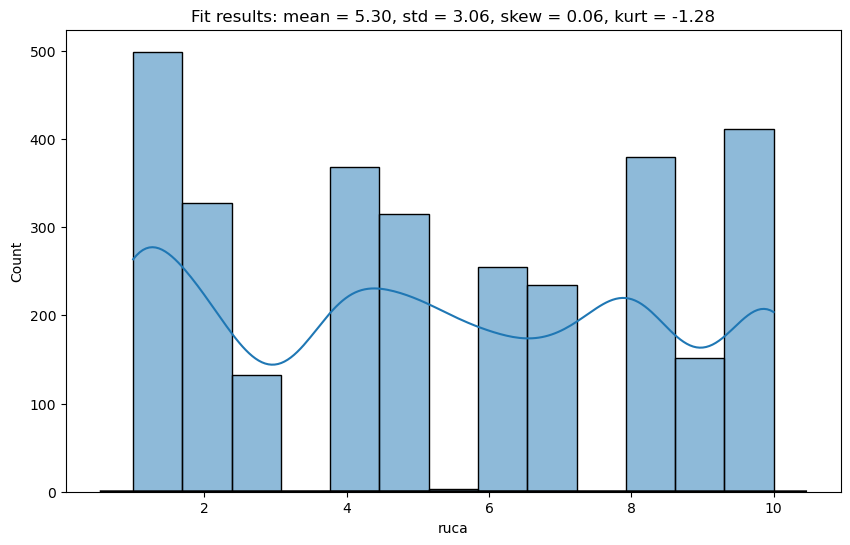

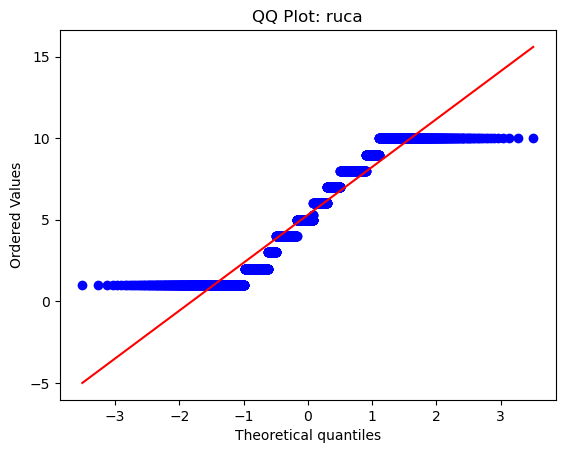

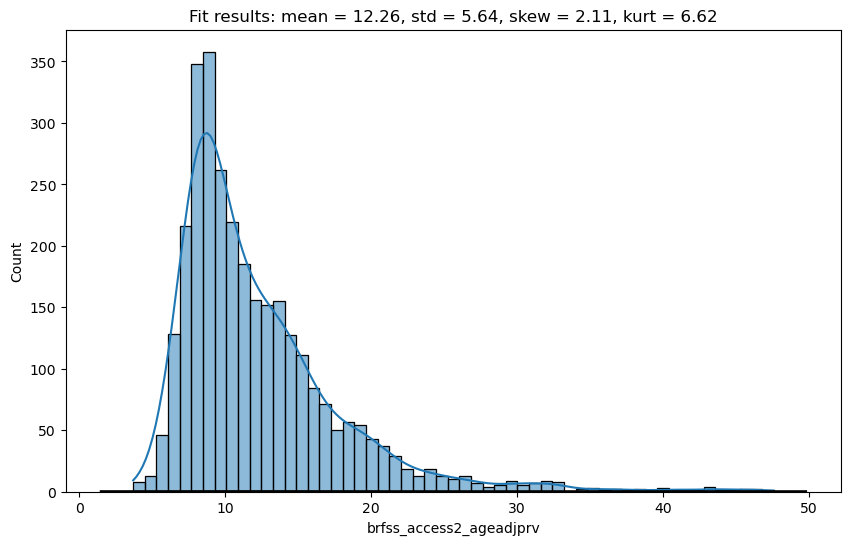

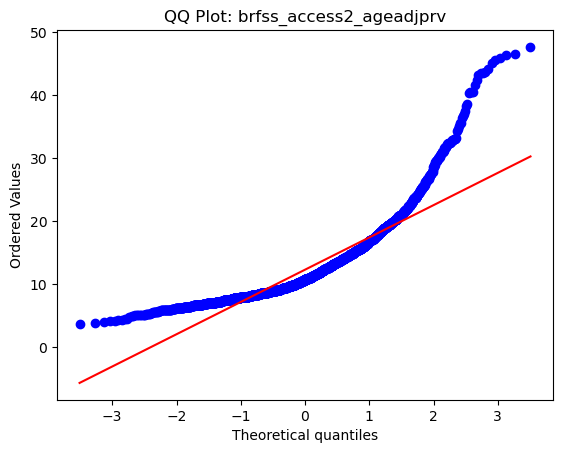

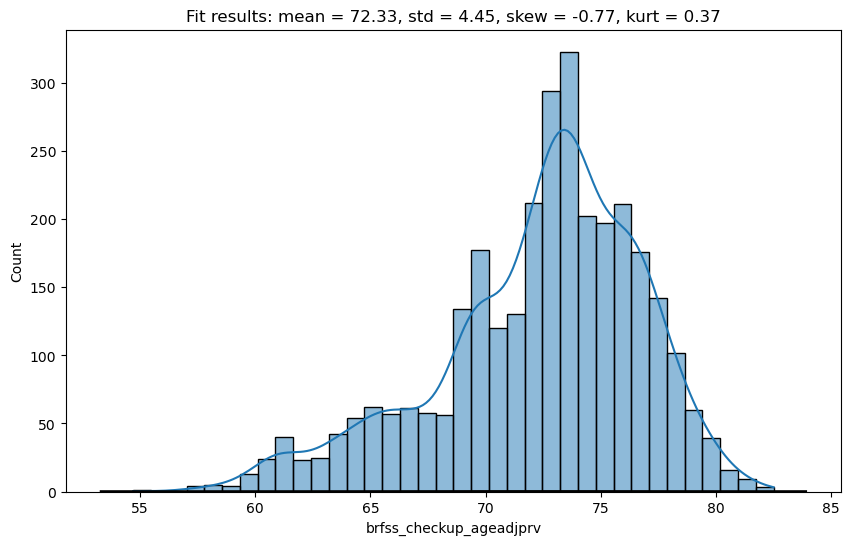

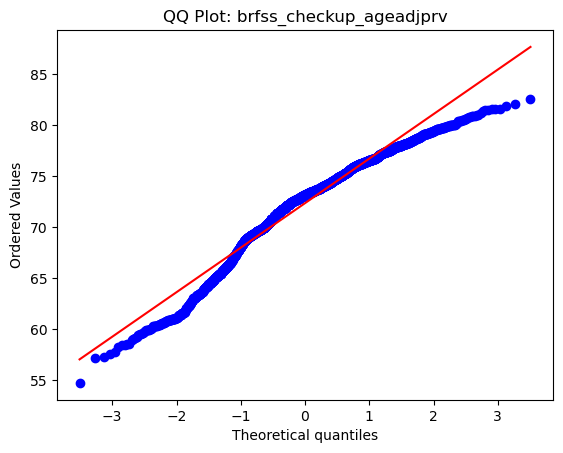

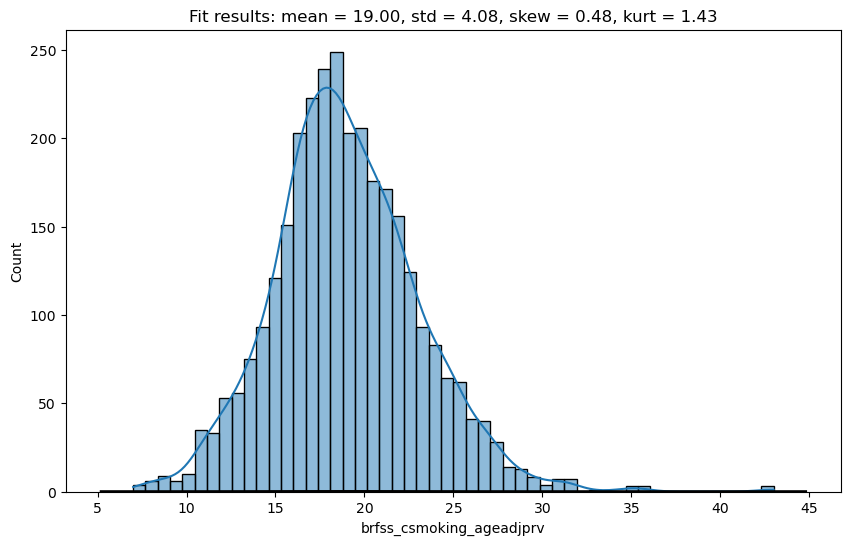

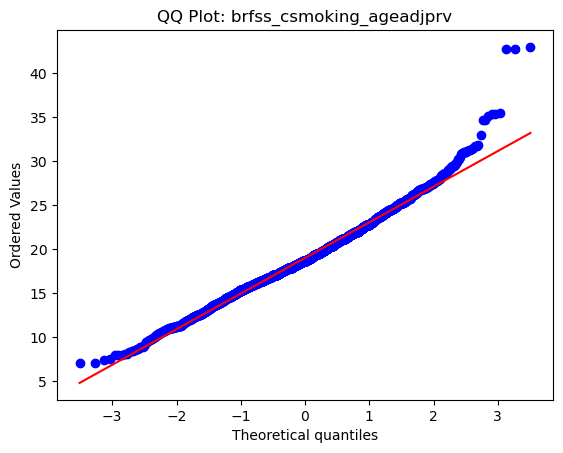

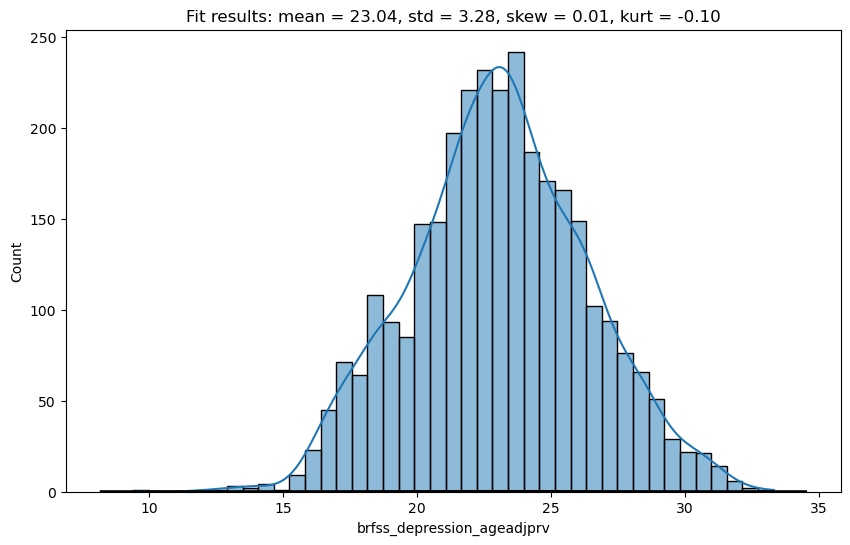

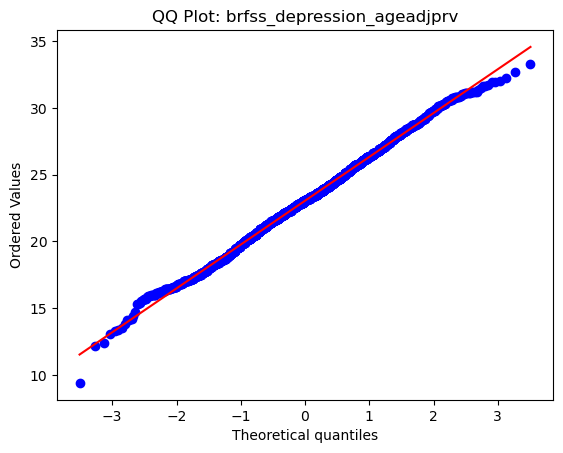

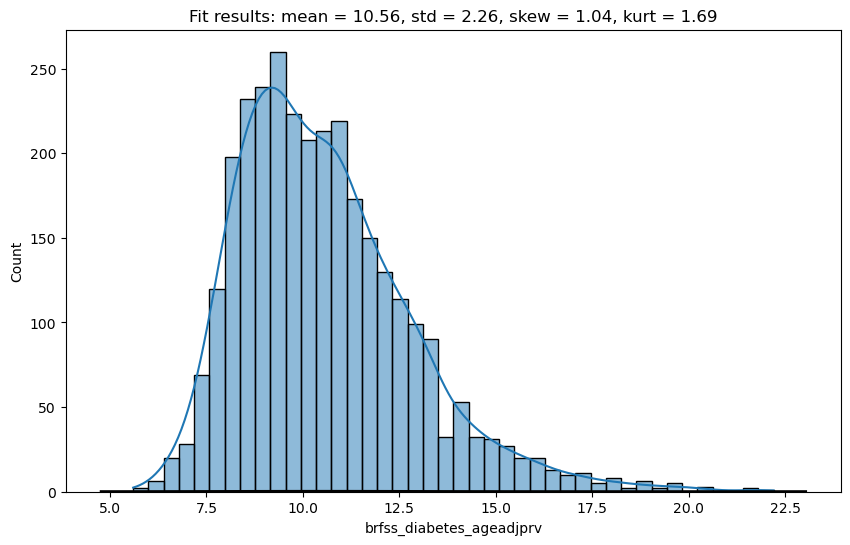

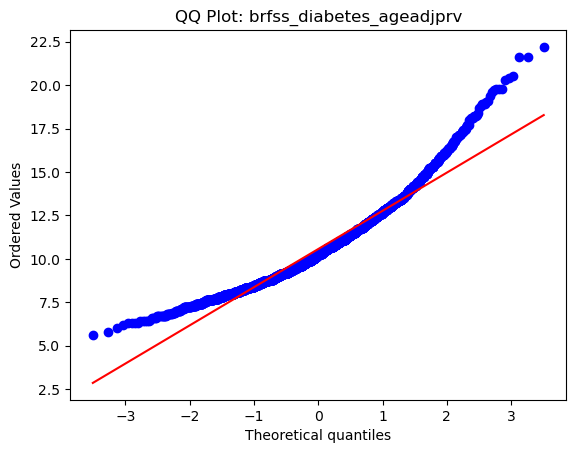

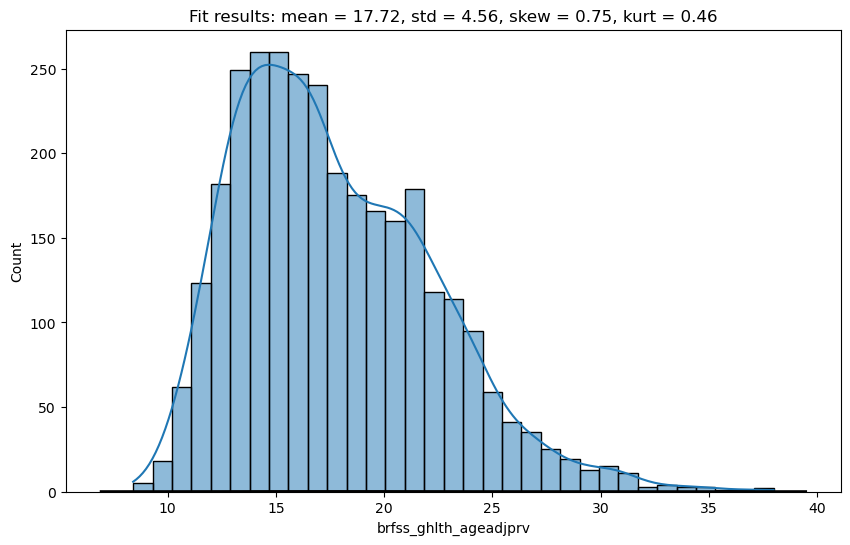

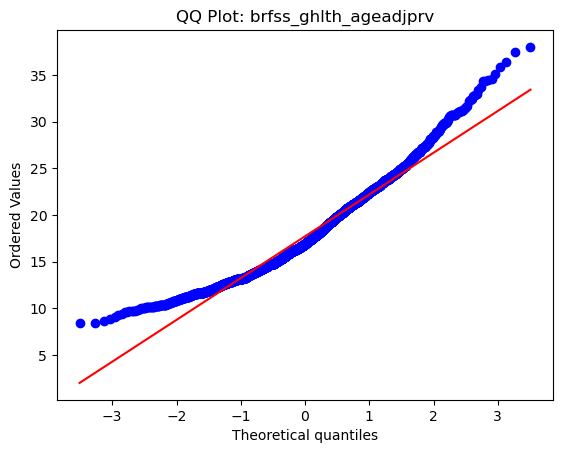

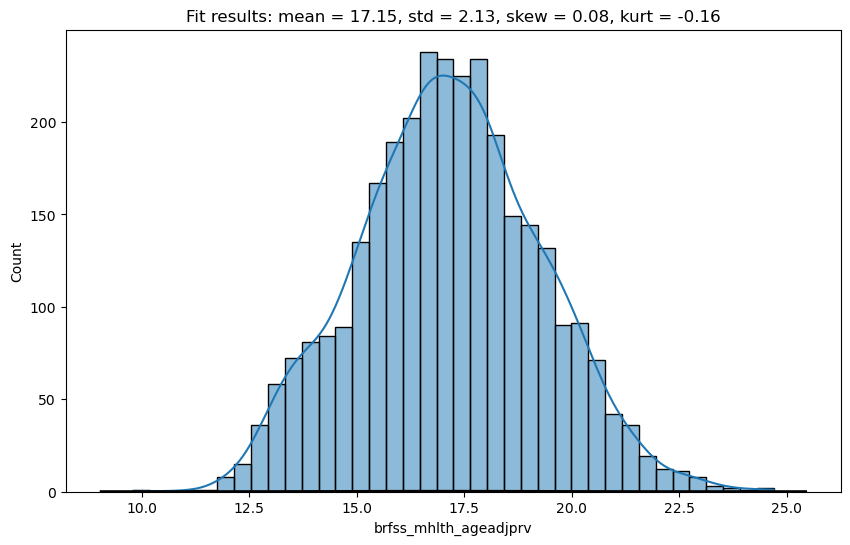

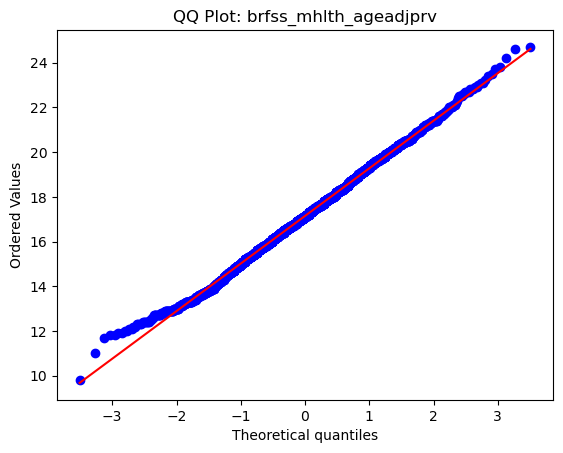

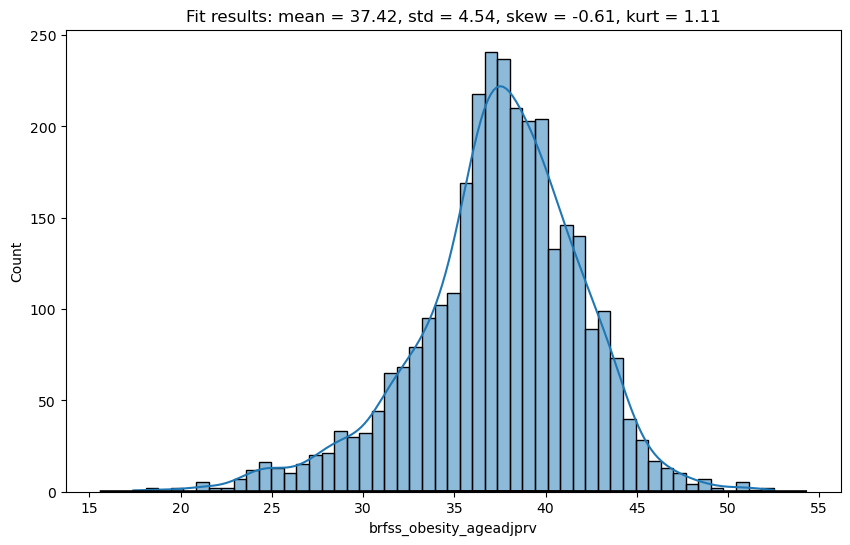

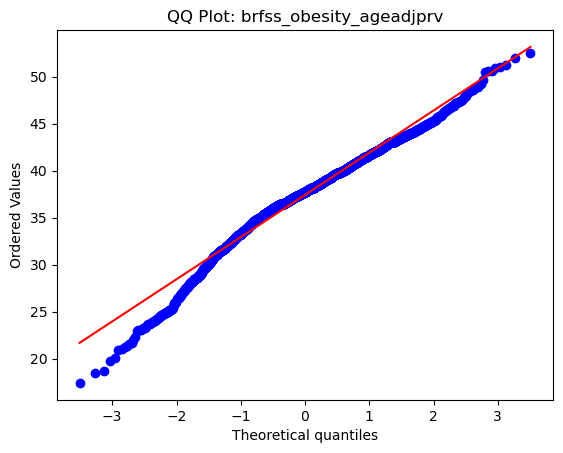

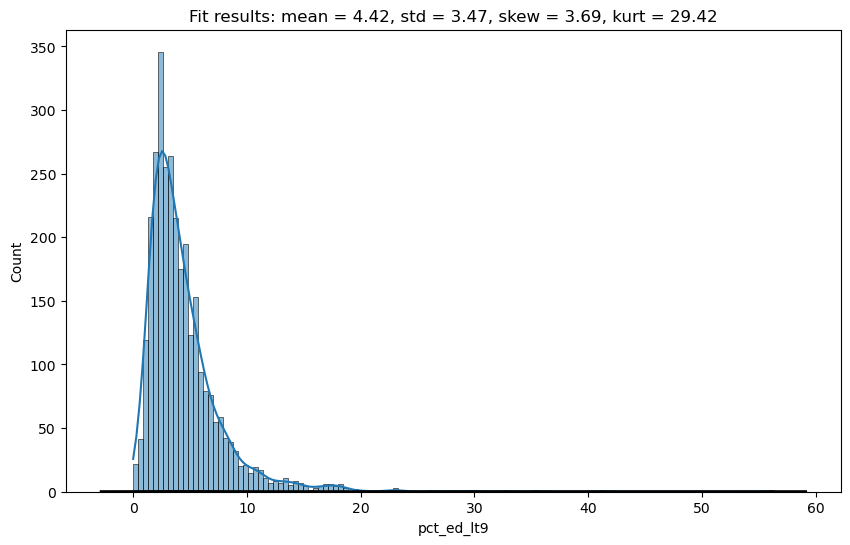

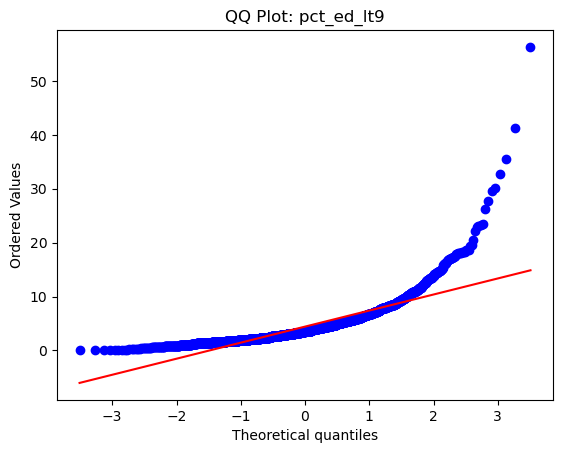

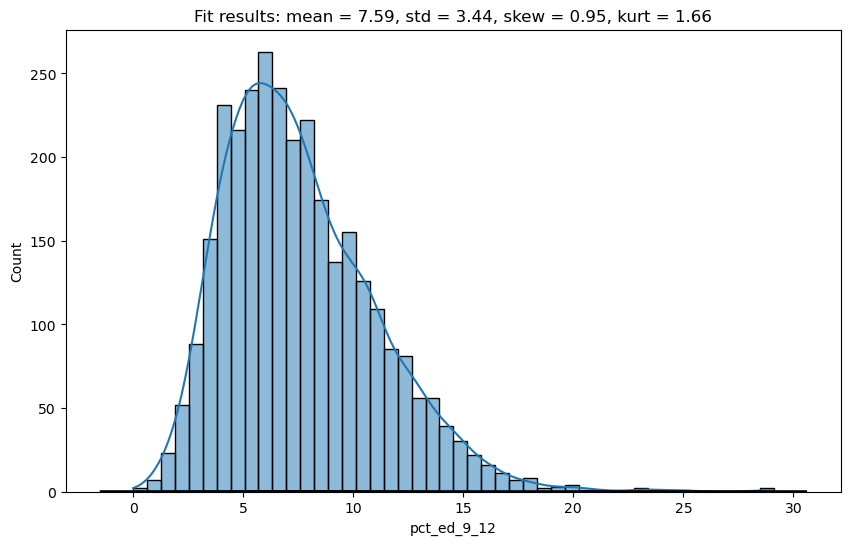

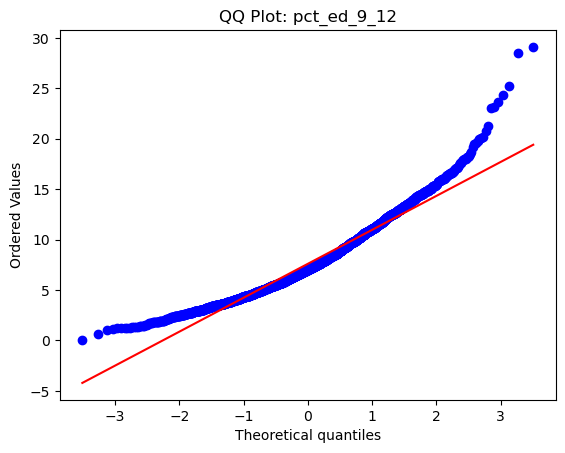

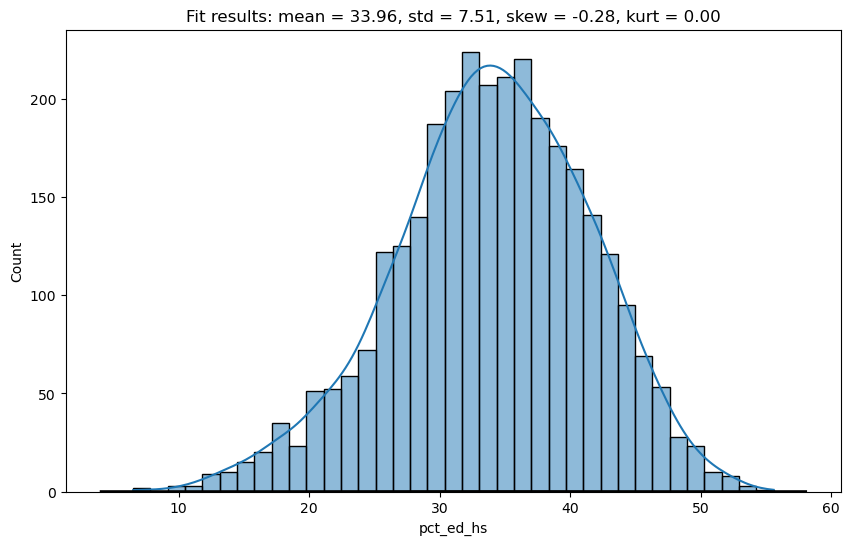

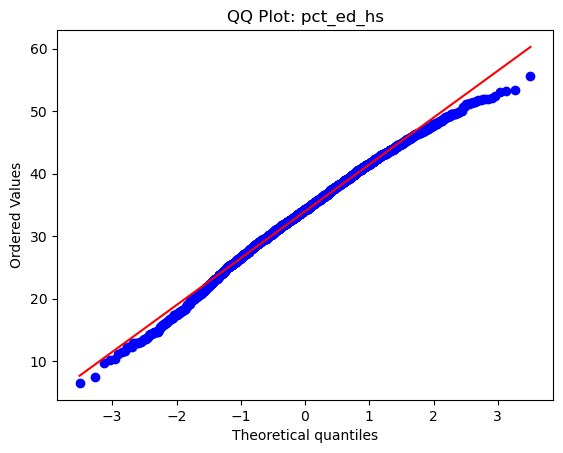

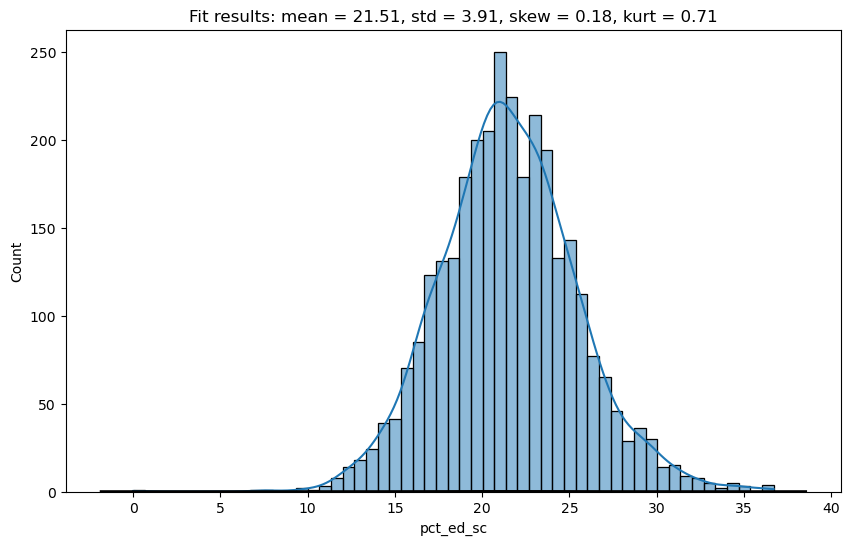

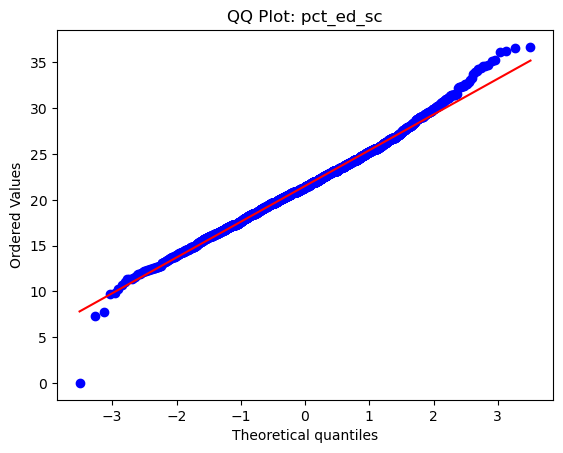

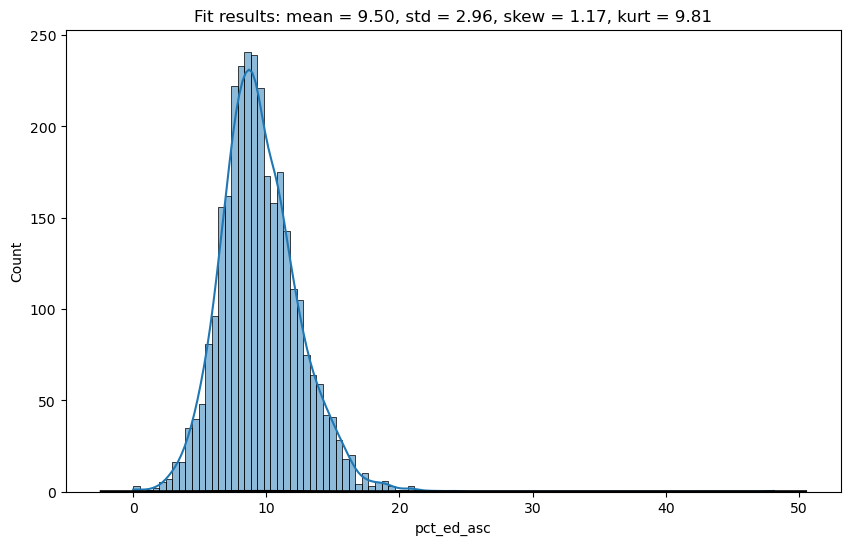

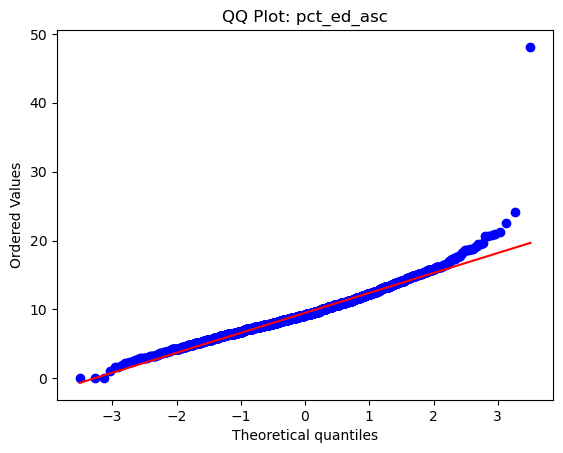

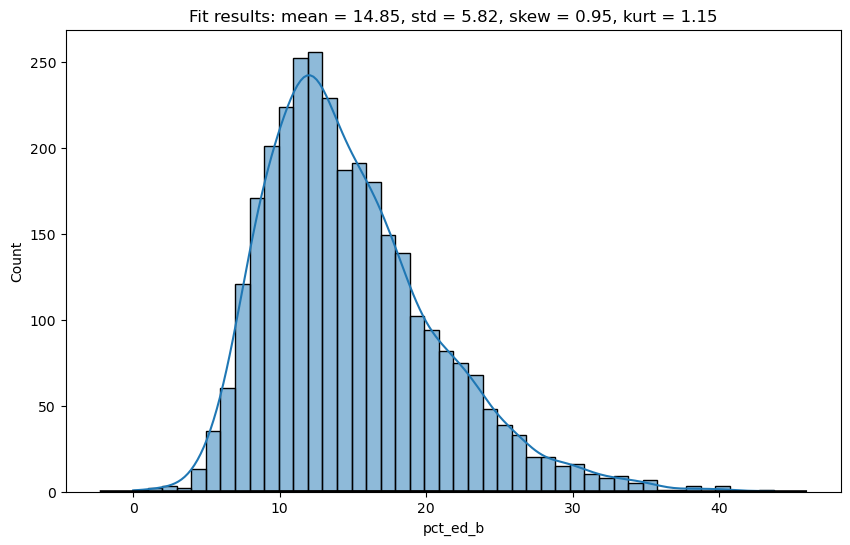

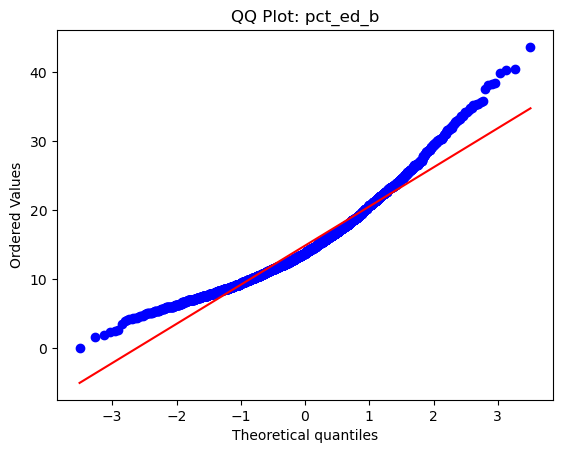

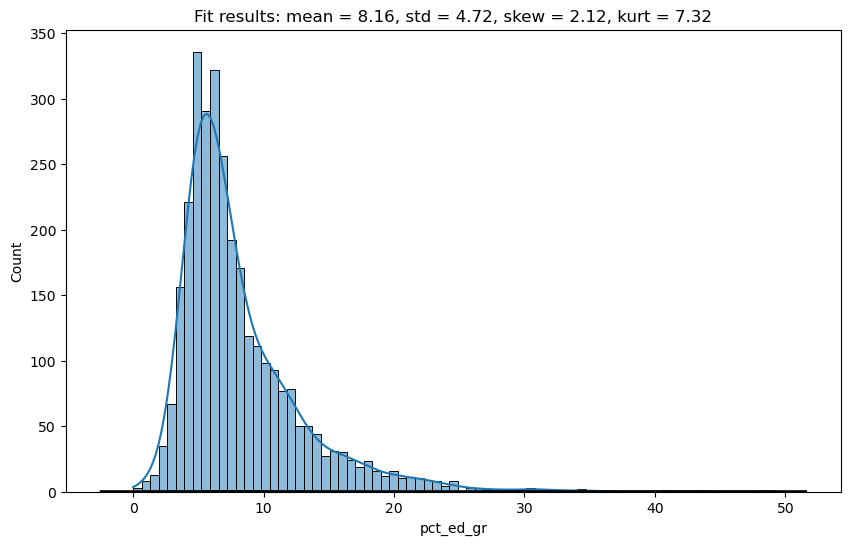

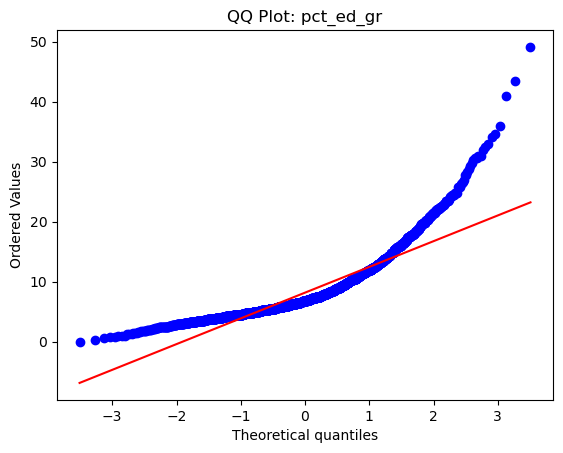

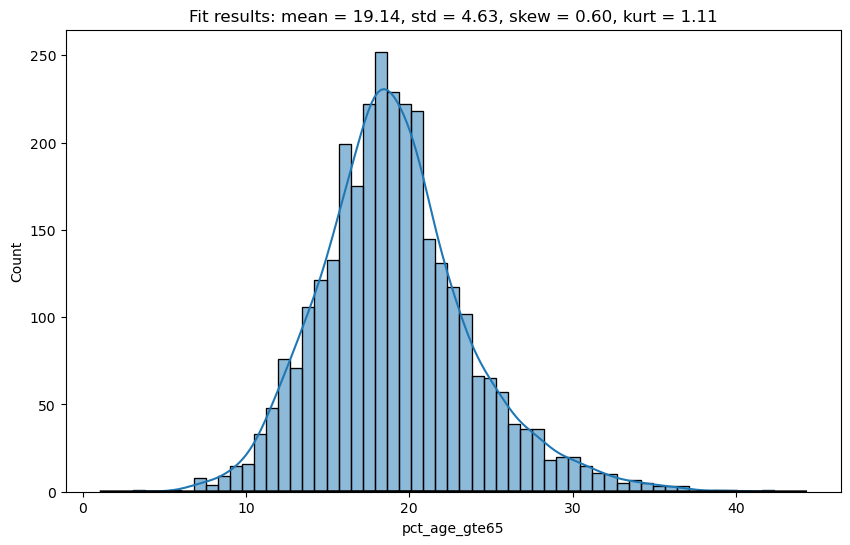

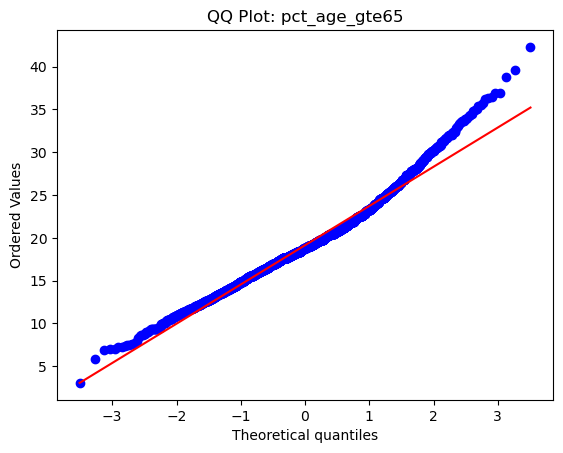

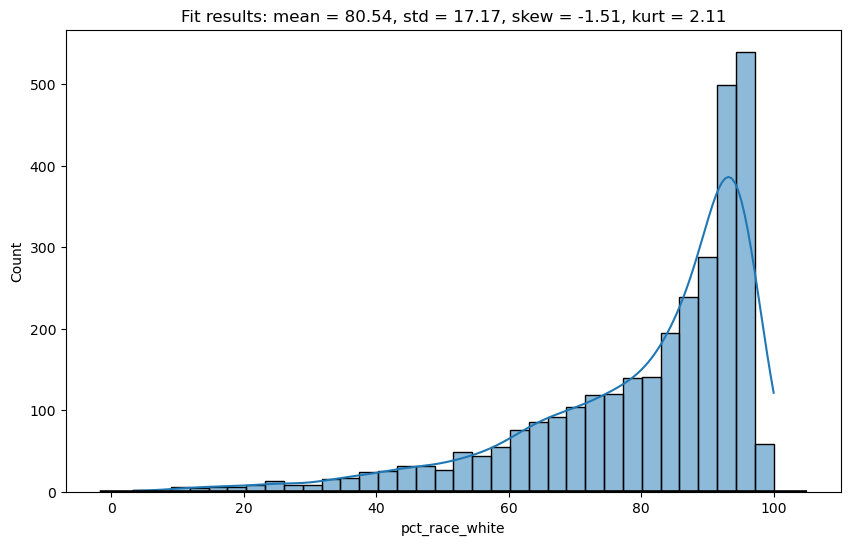

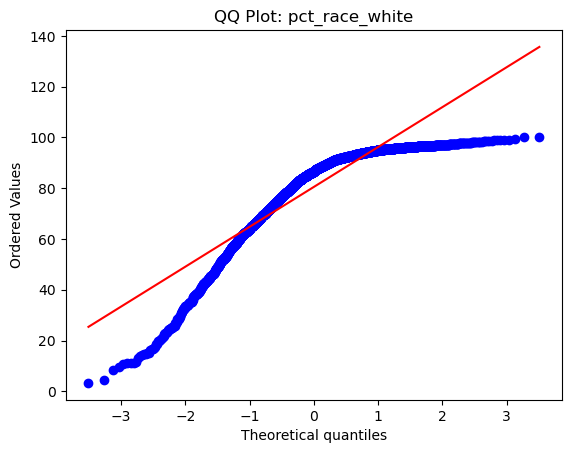

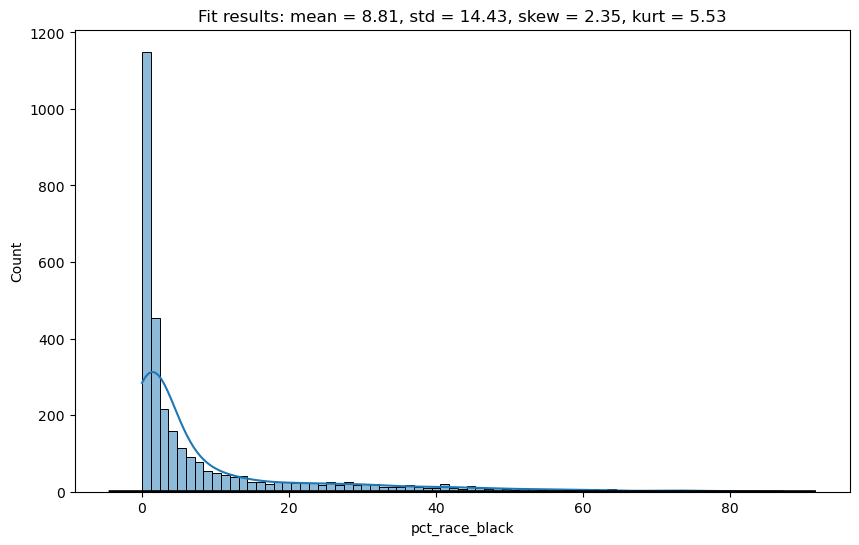

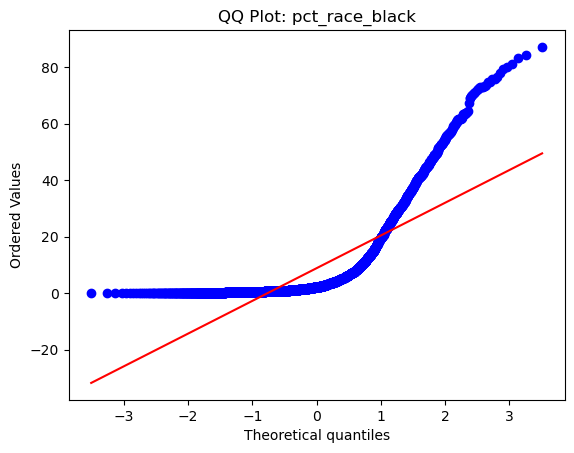

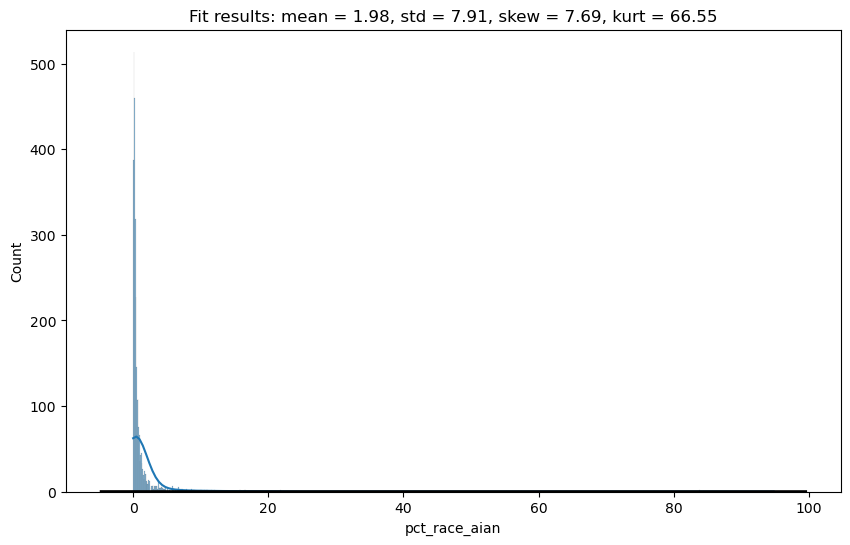

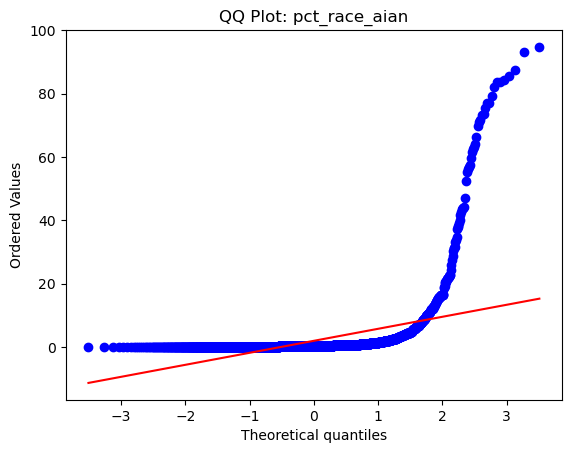

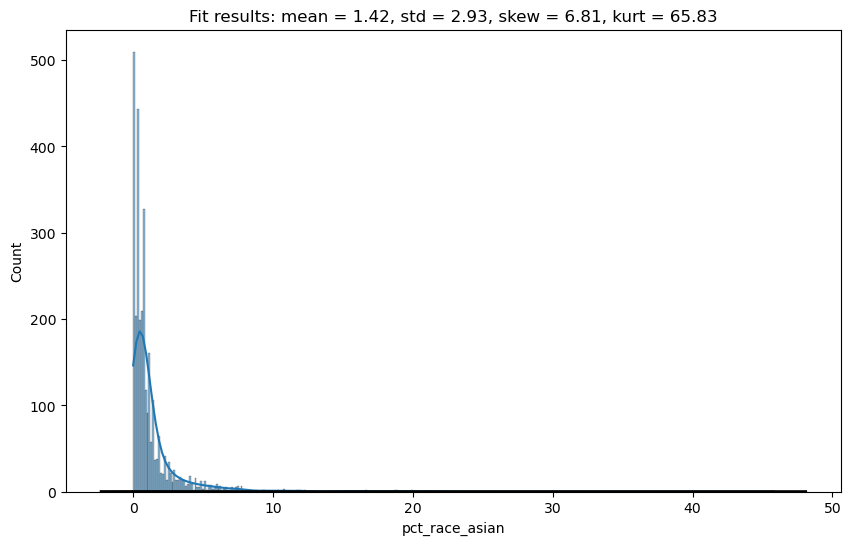

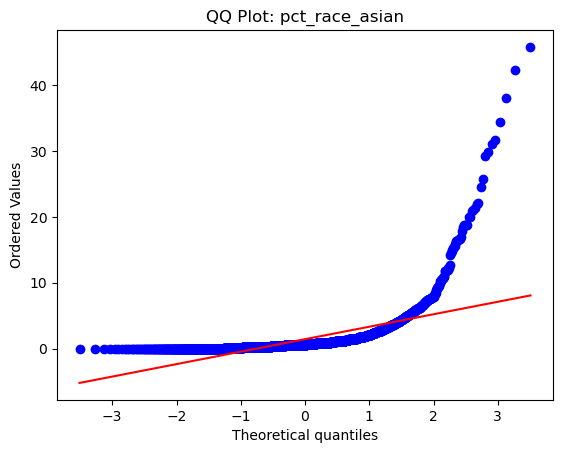

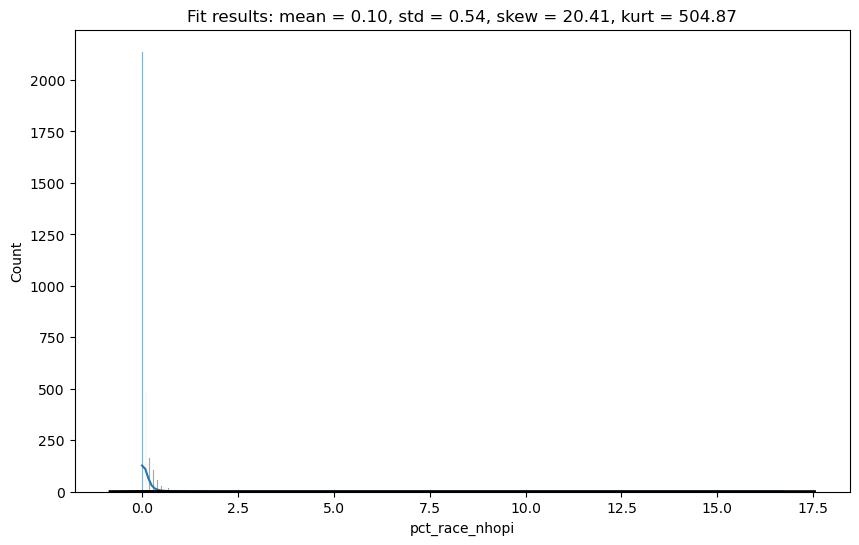

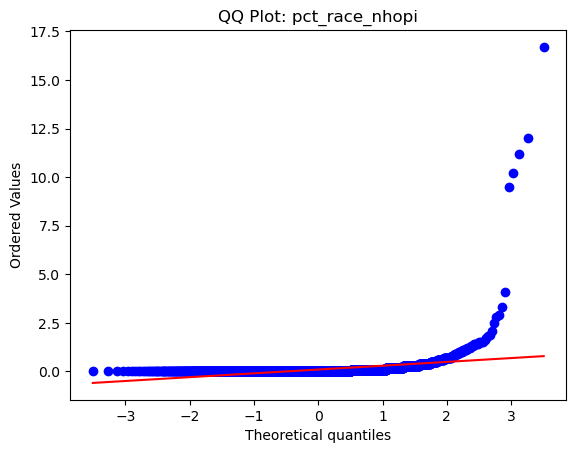

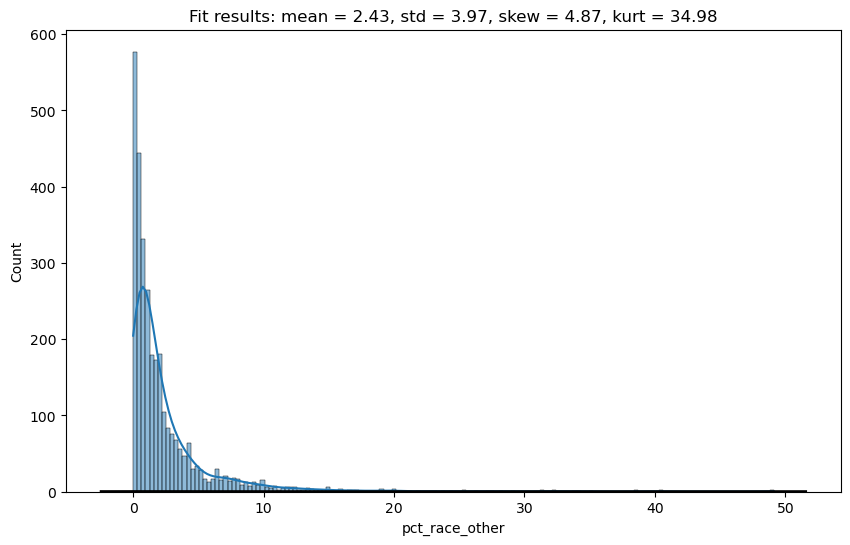

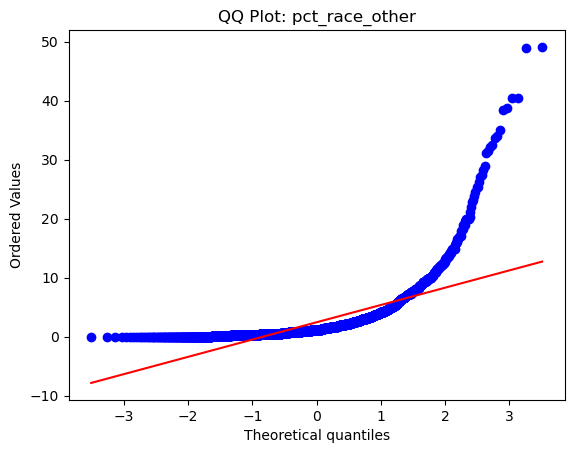

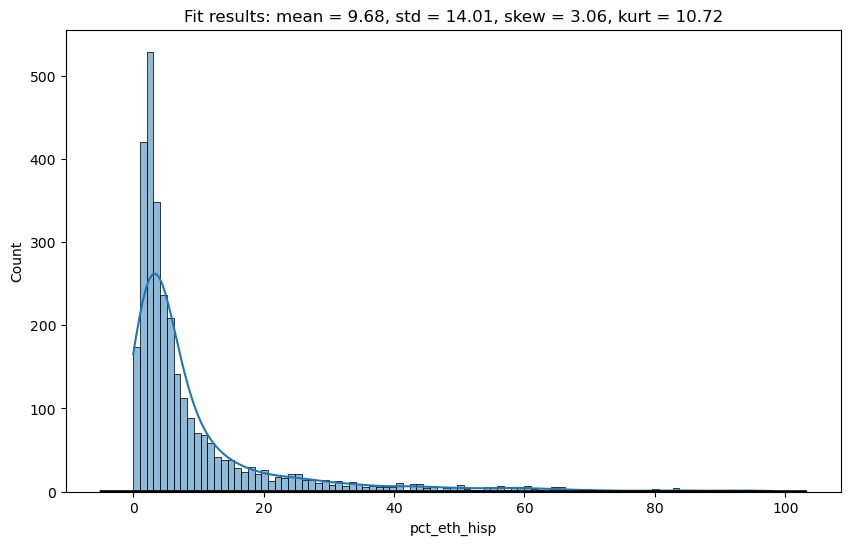

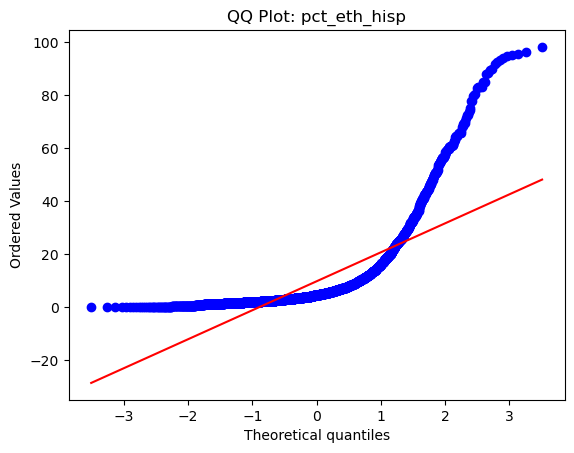

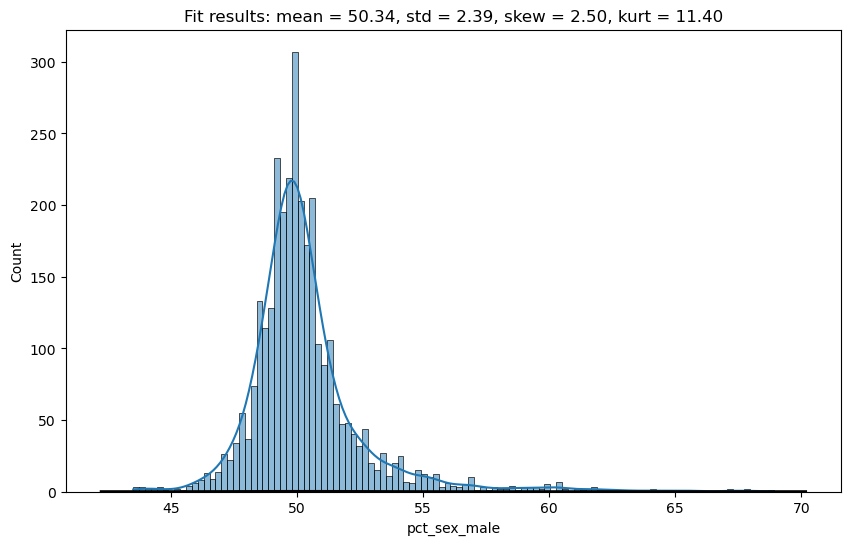

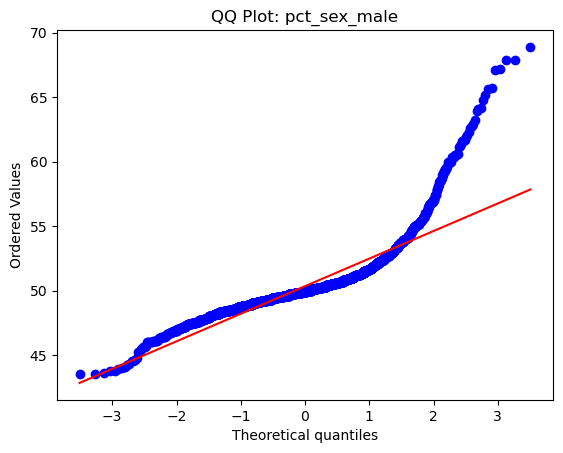

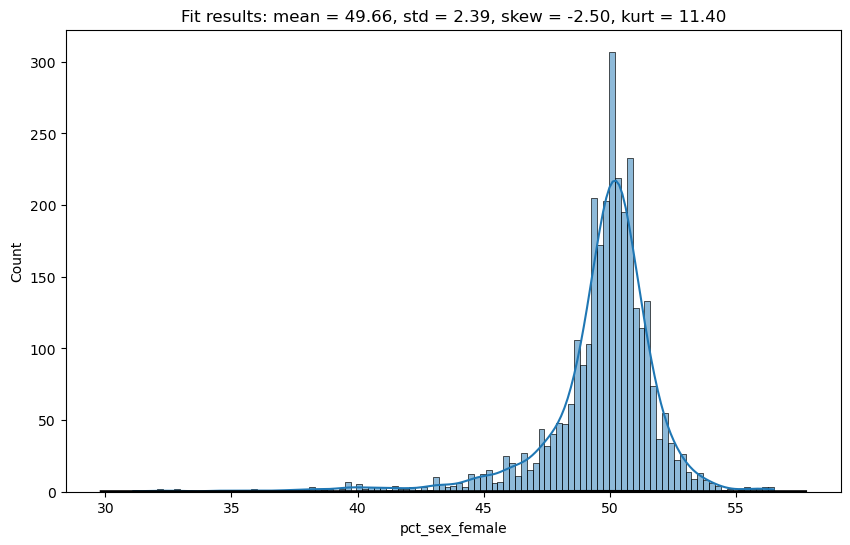

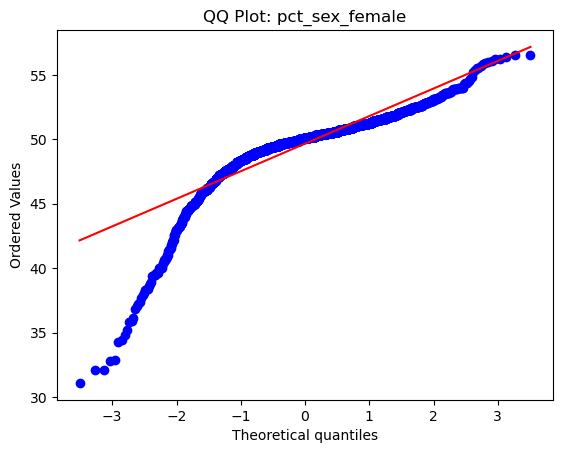

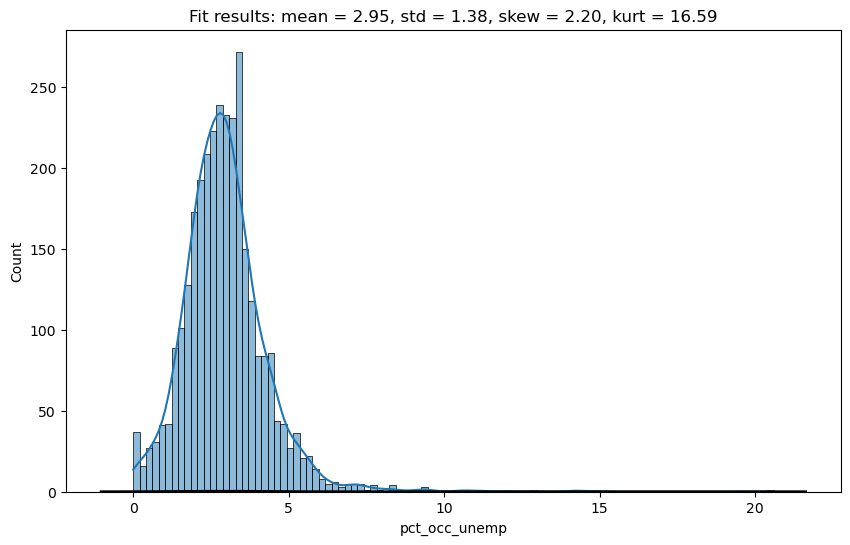

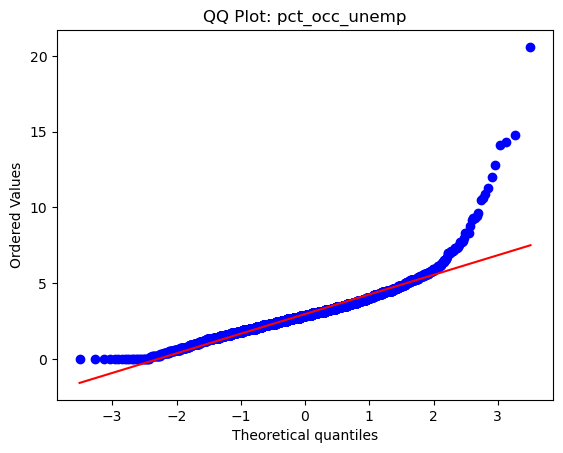

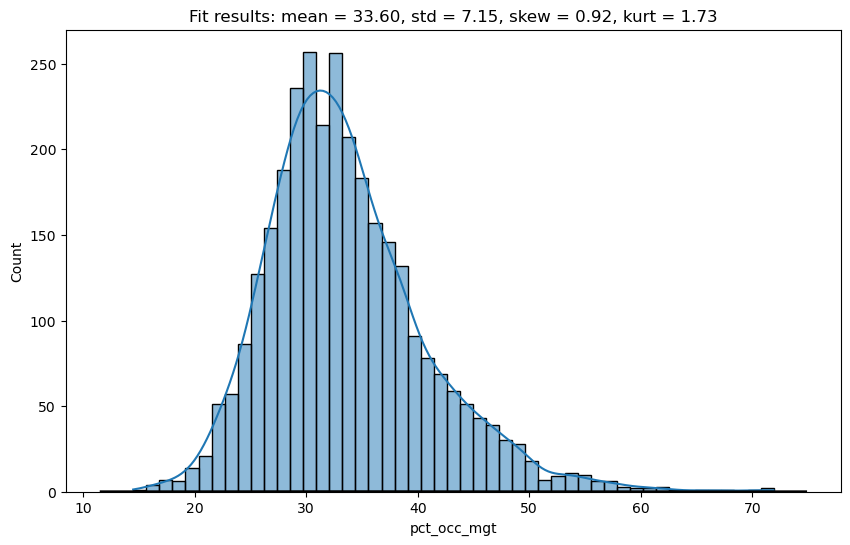

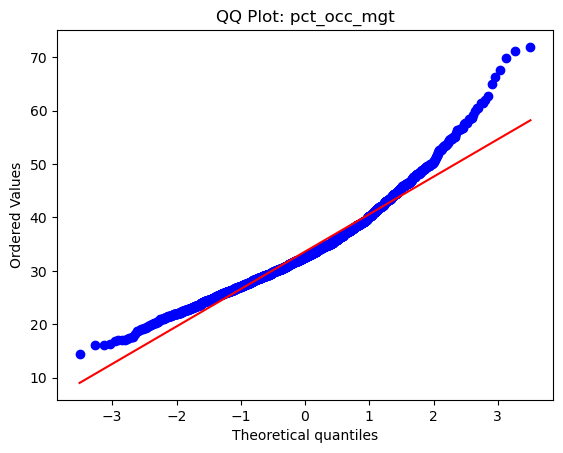

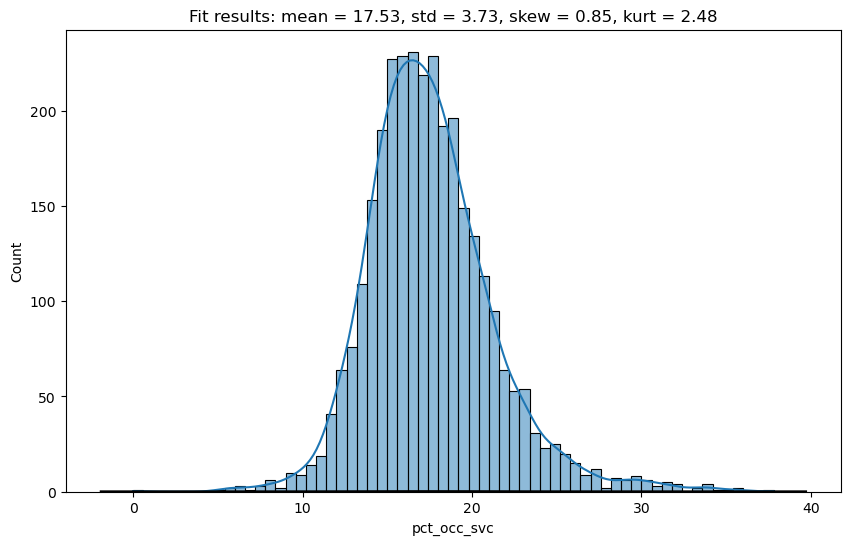

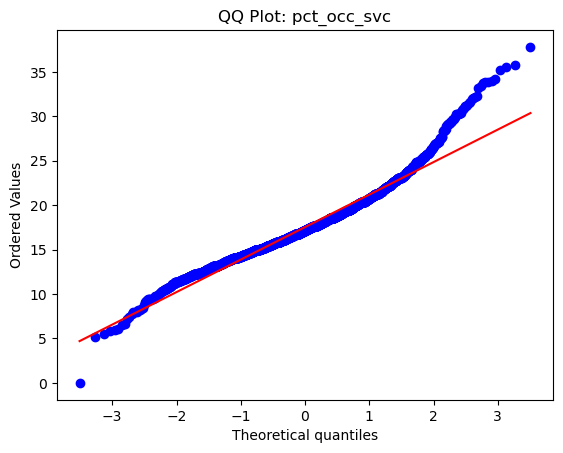

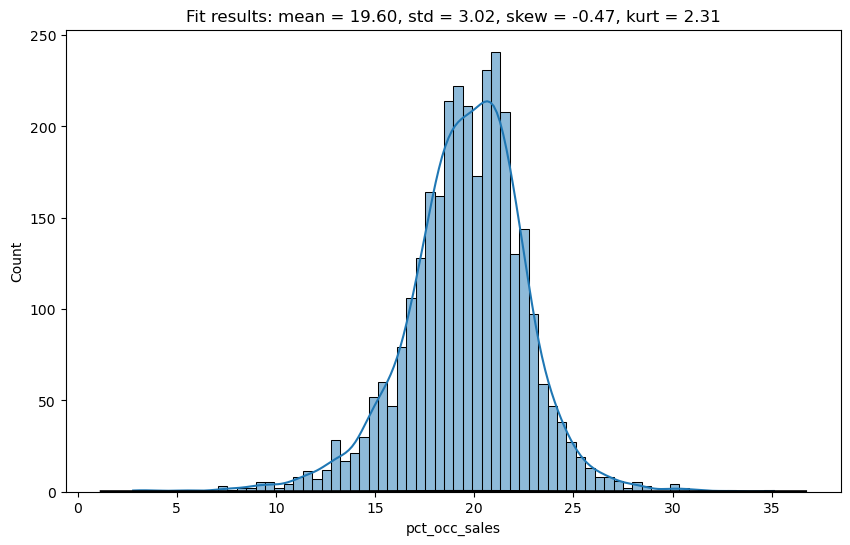

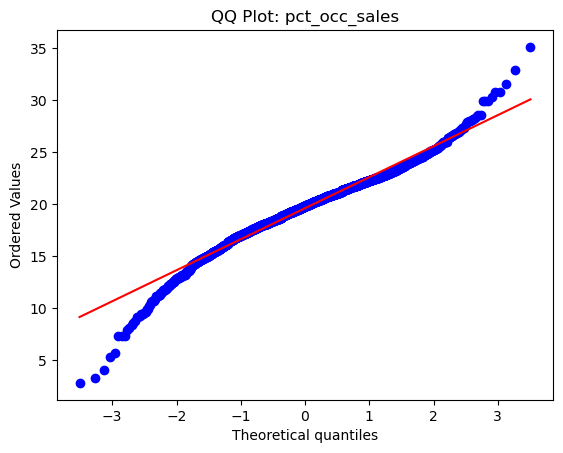

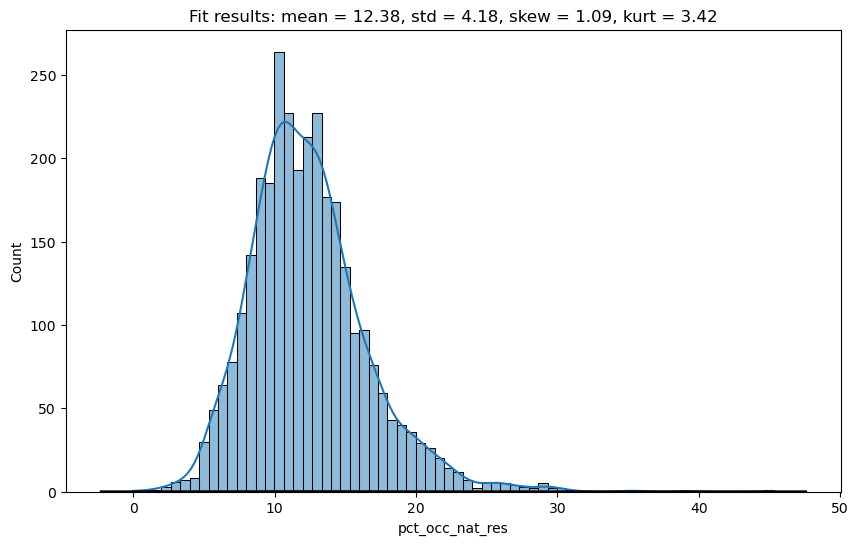

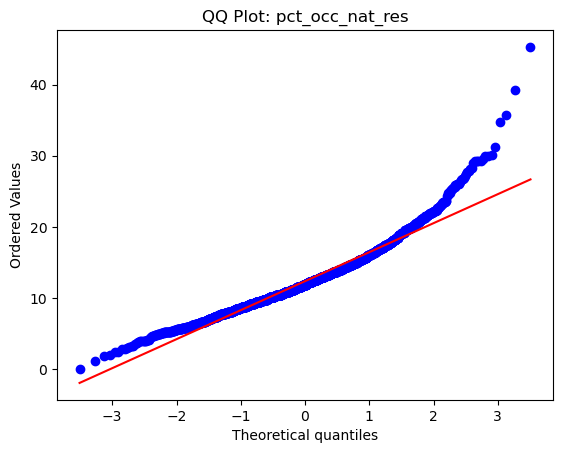

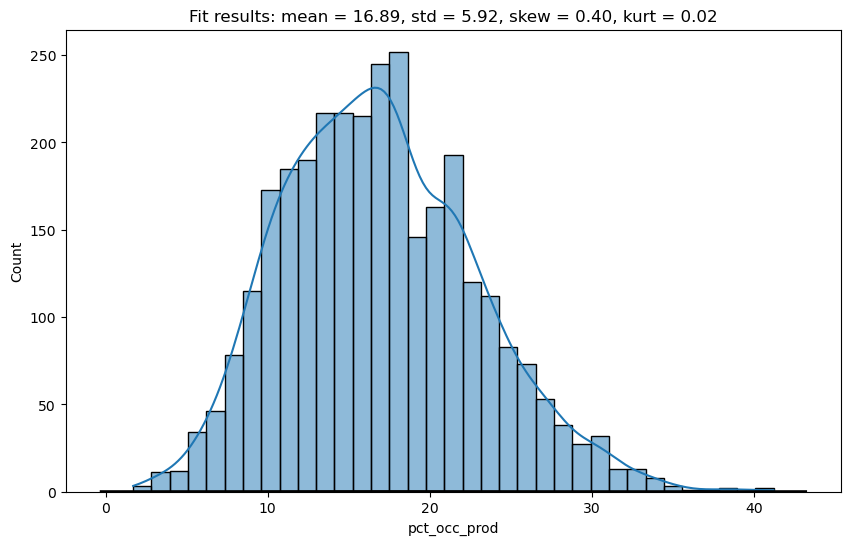

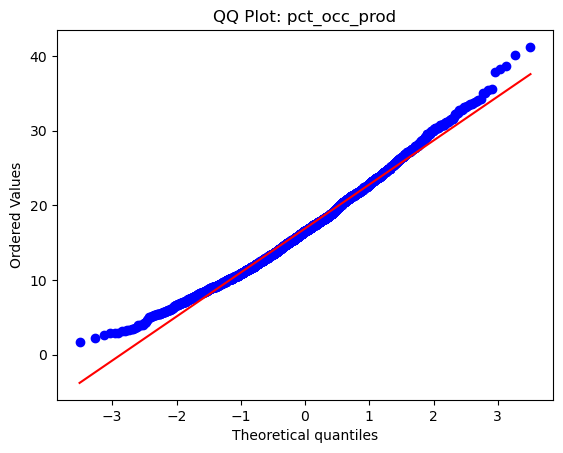

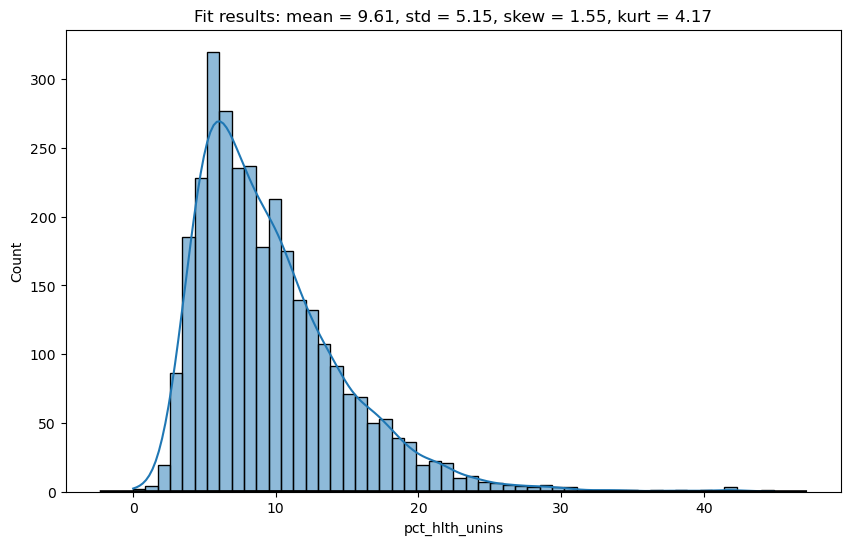

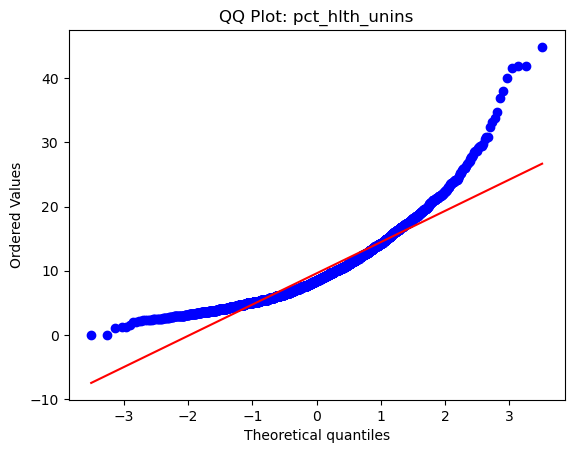

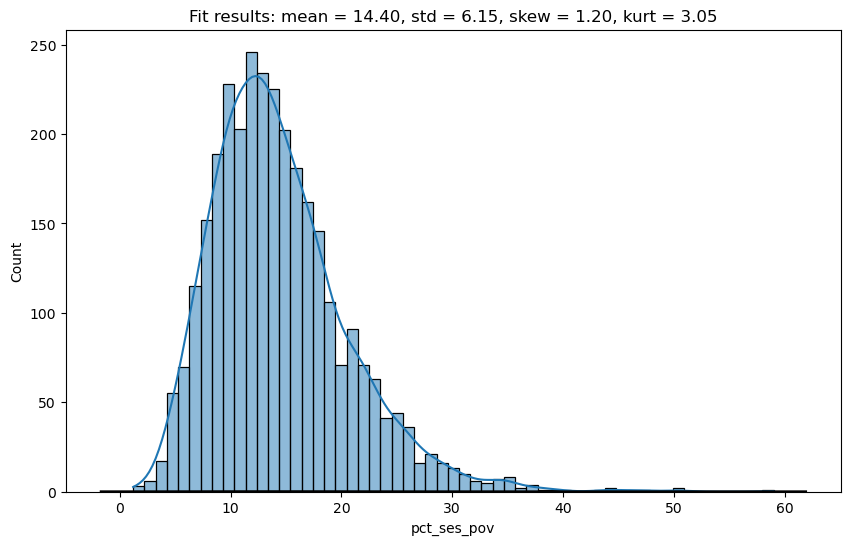

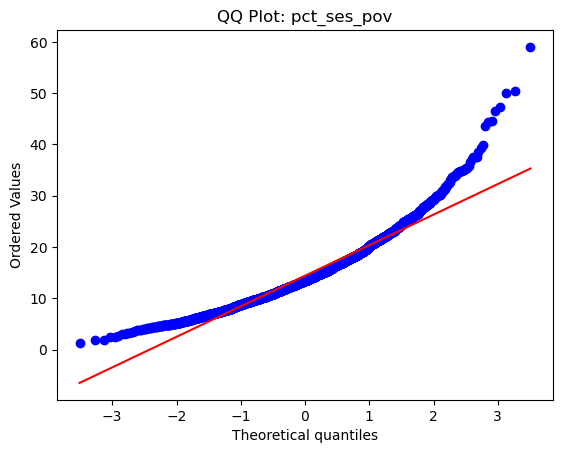

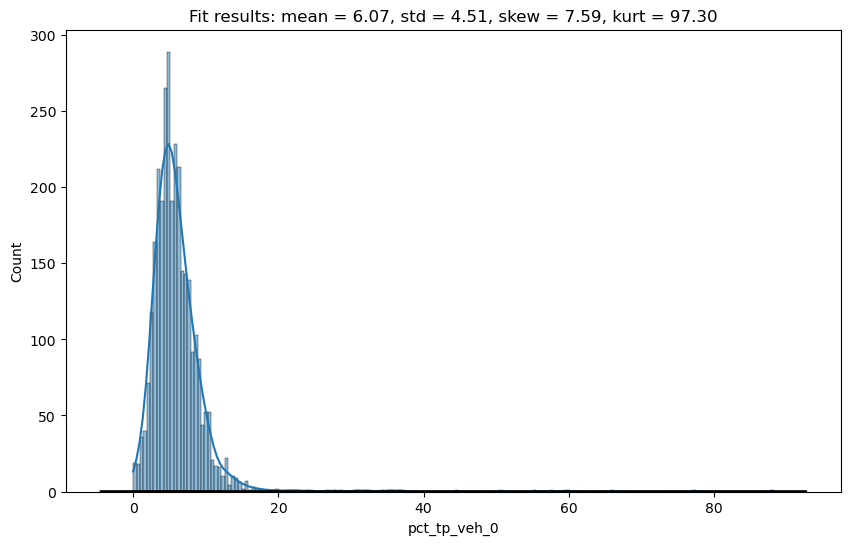

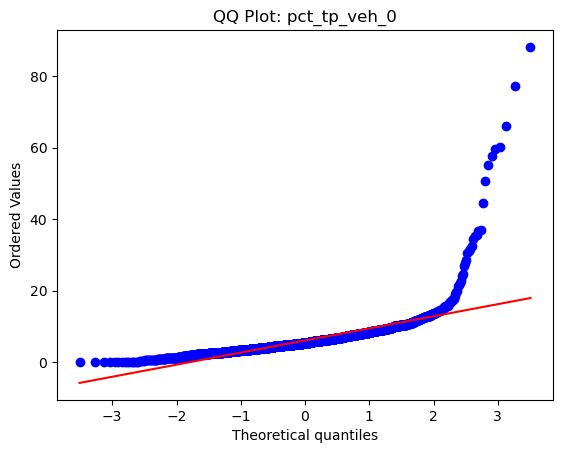

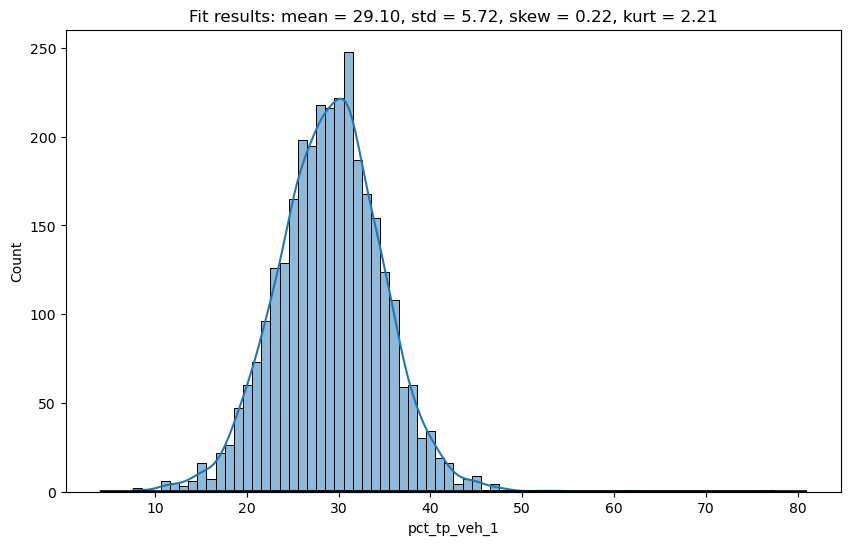

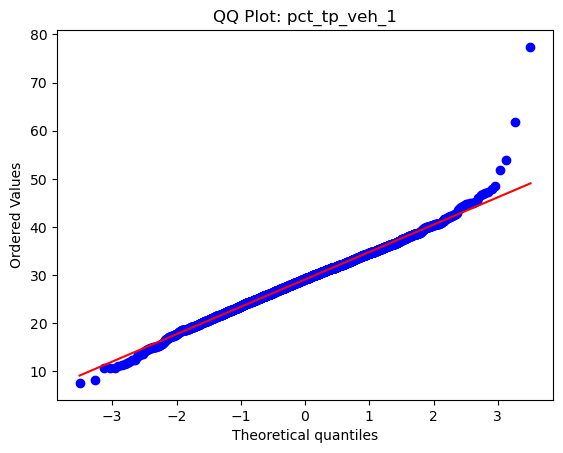

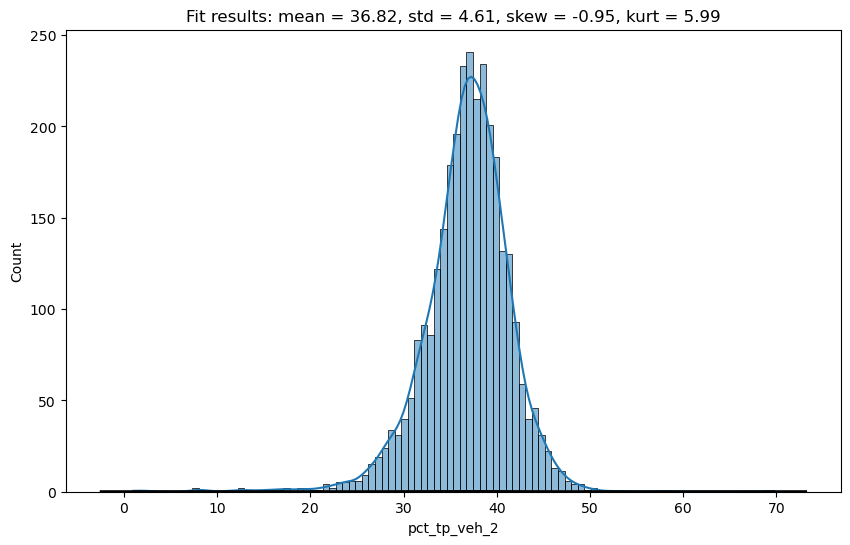

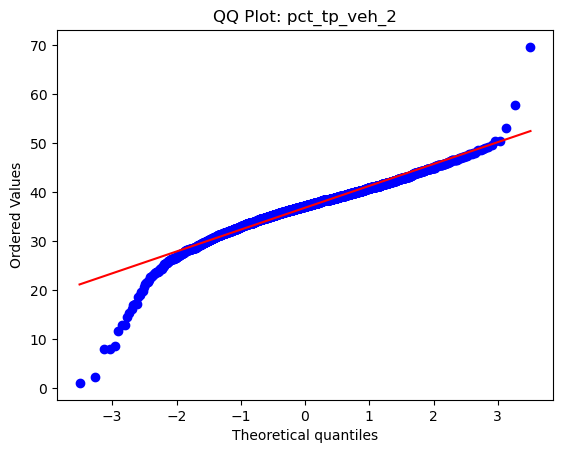

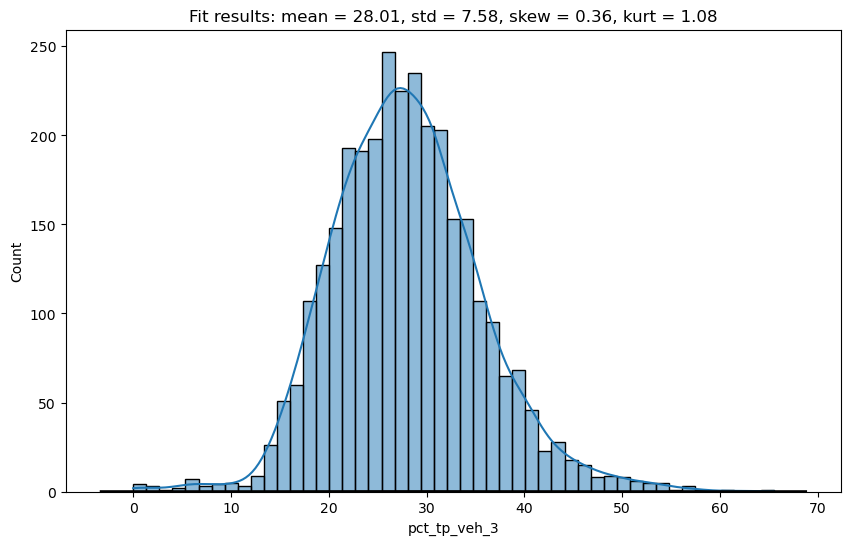

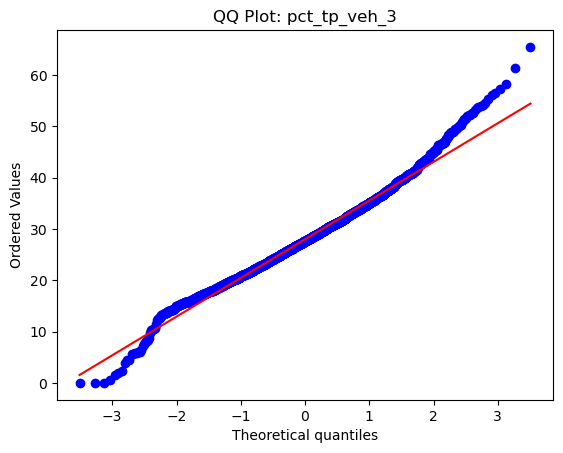

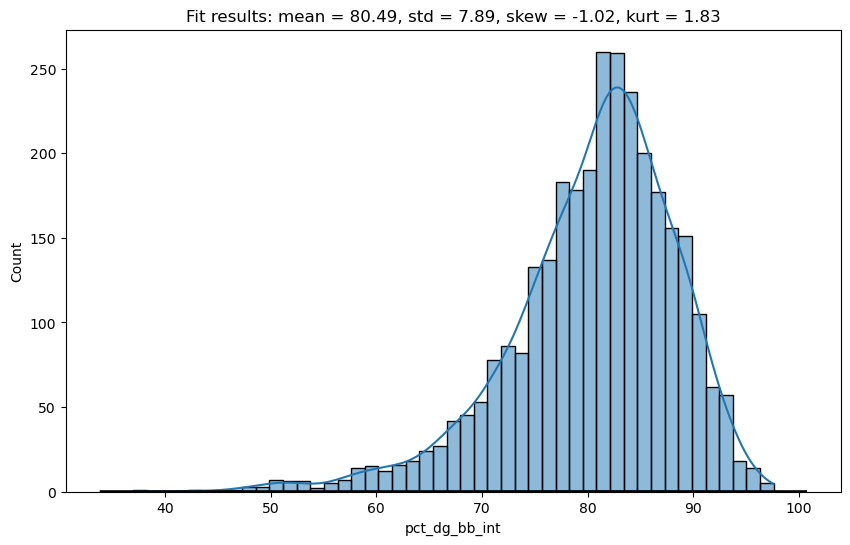

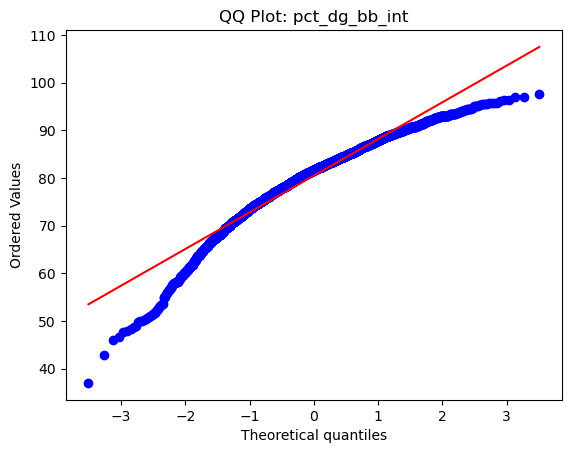

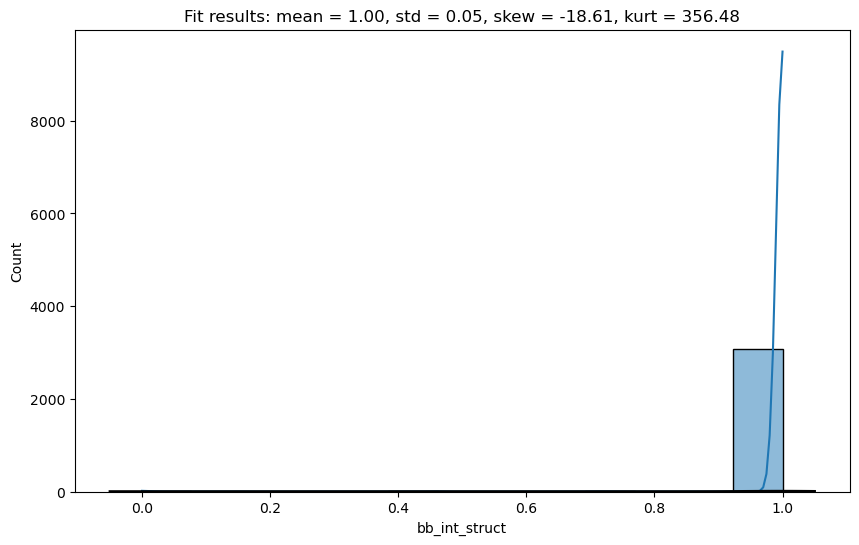

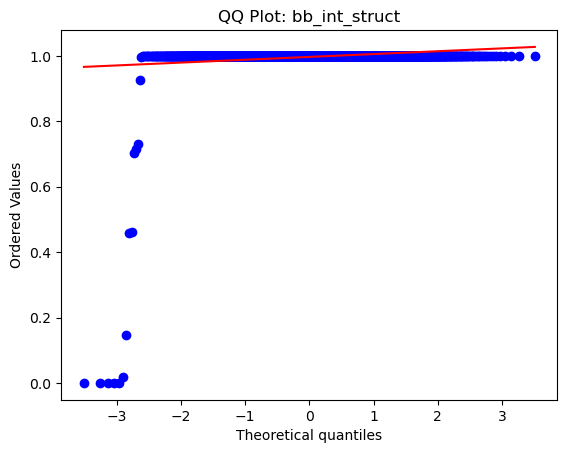

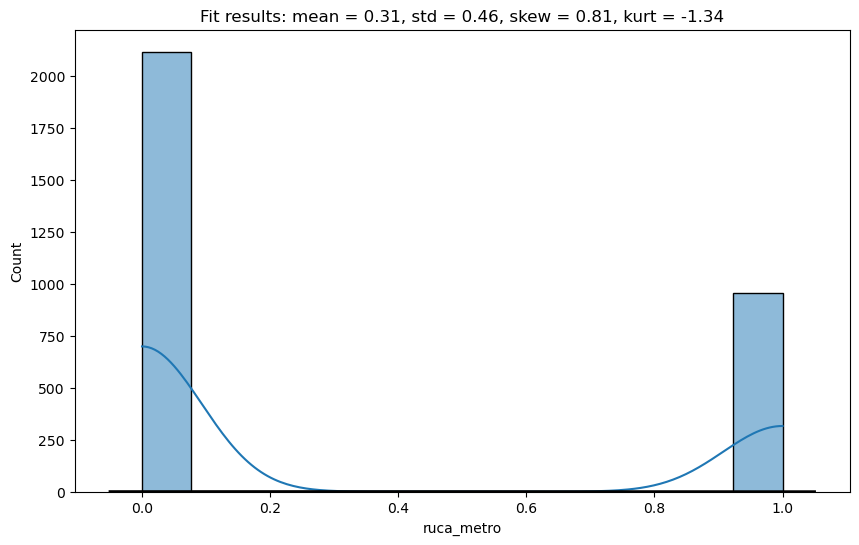

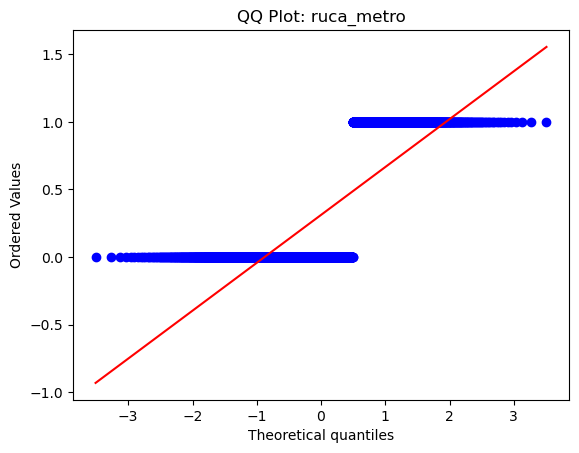

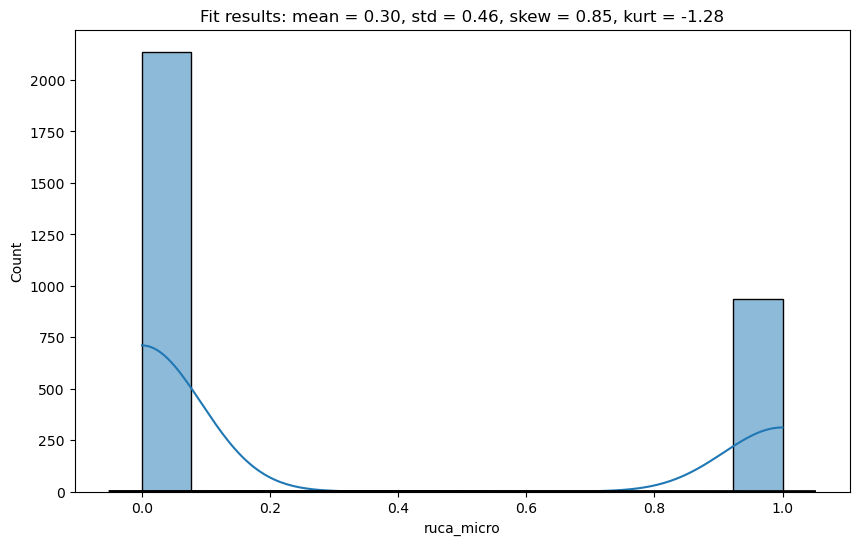

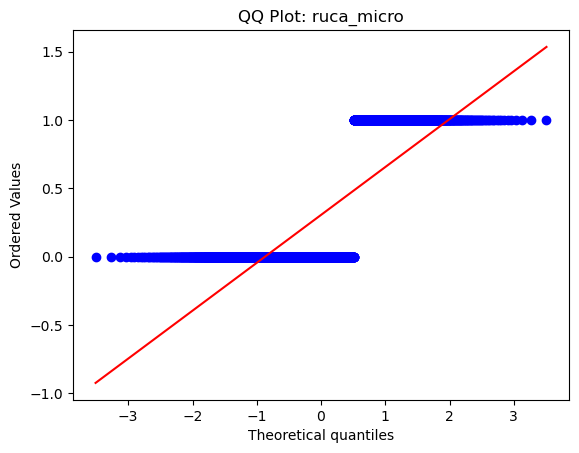

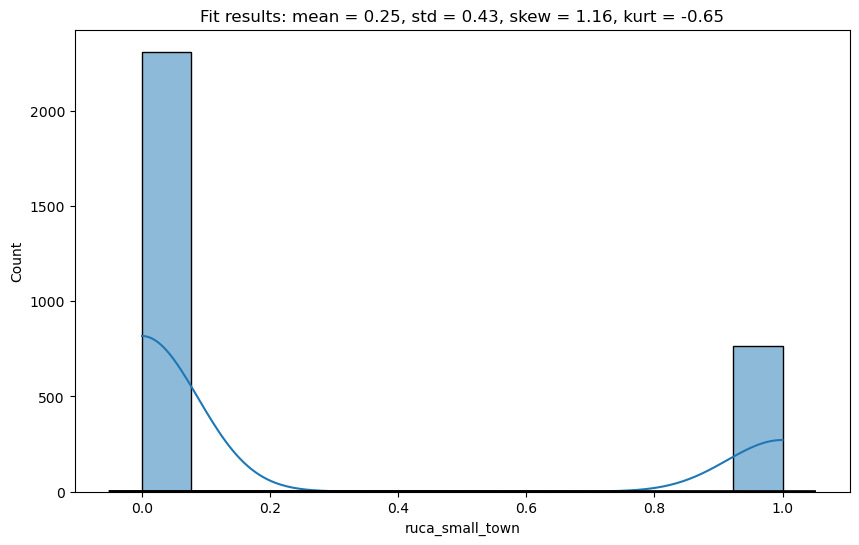

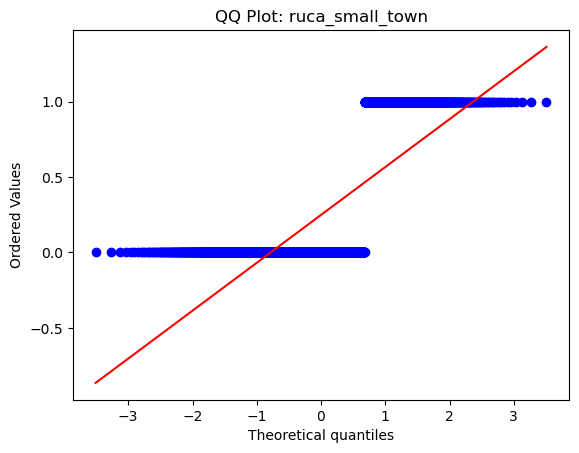

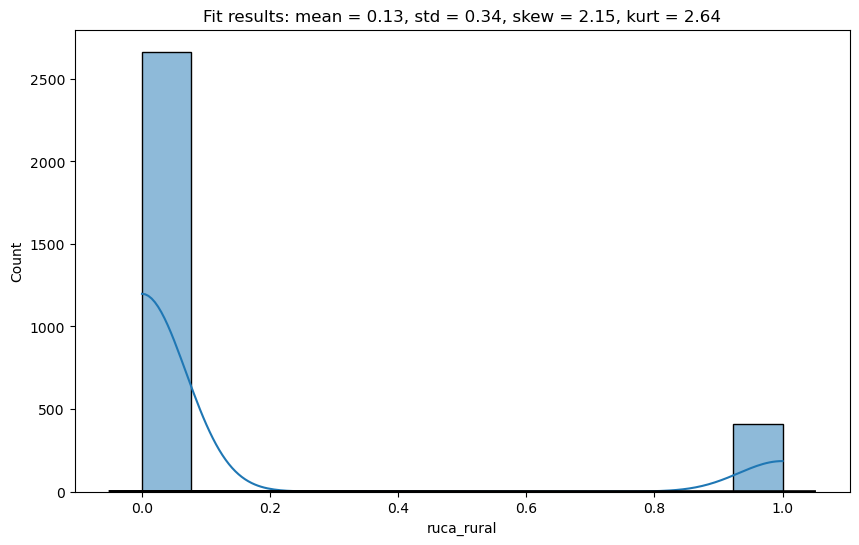

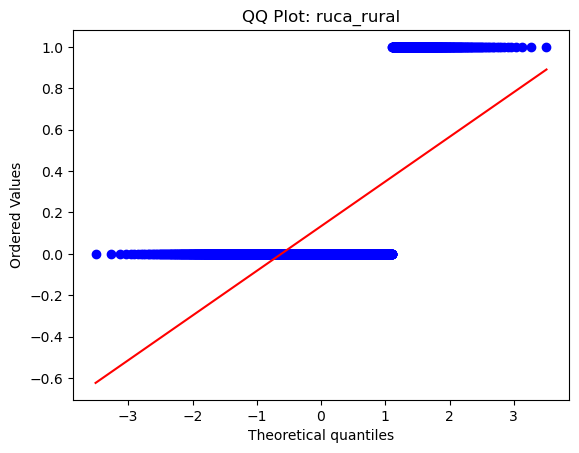

In [11]:
for i in features:
    analyze_distribution(df, i)


## Univariate Analysis - Correlation

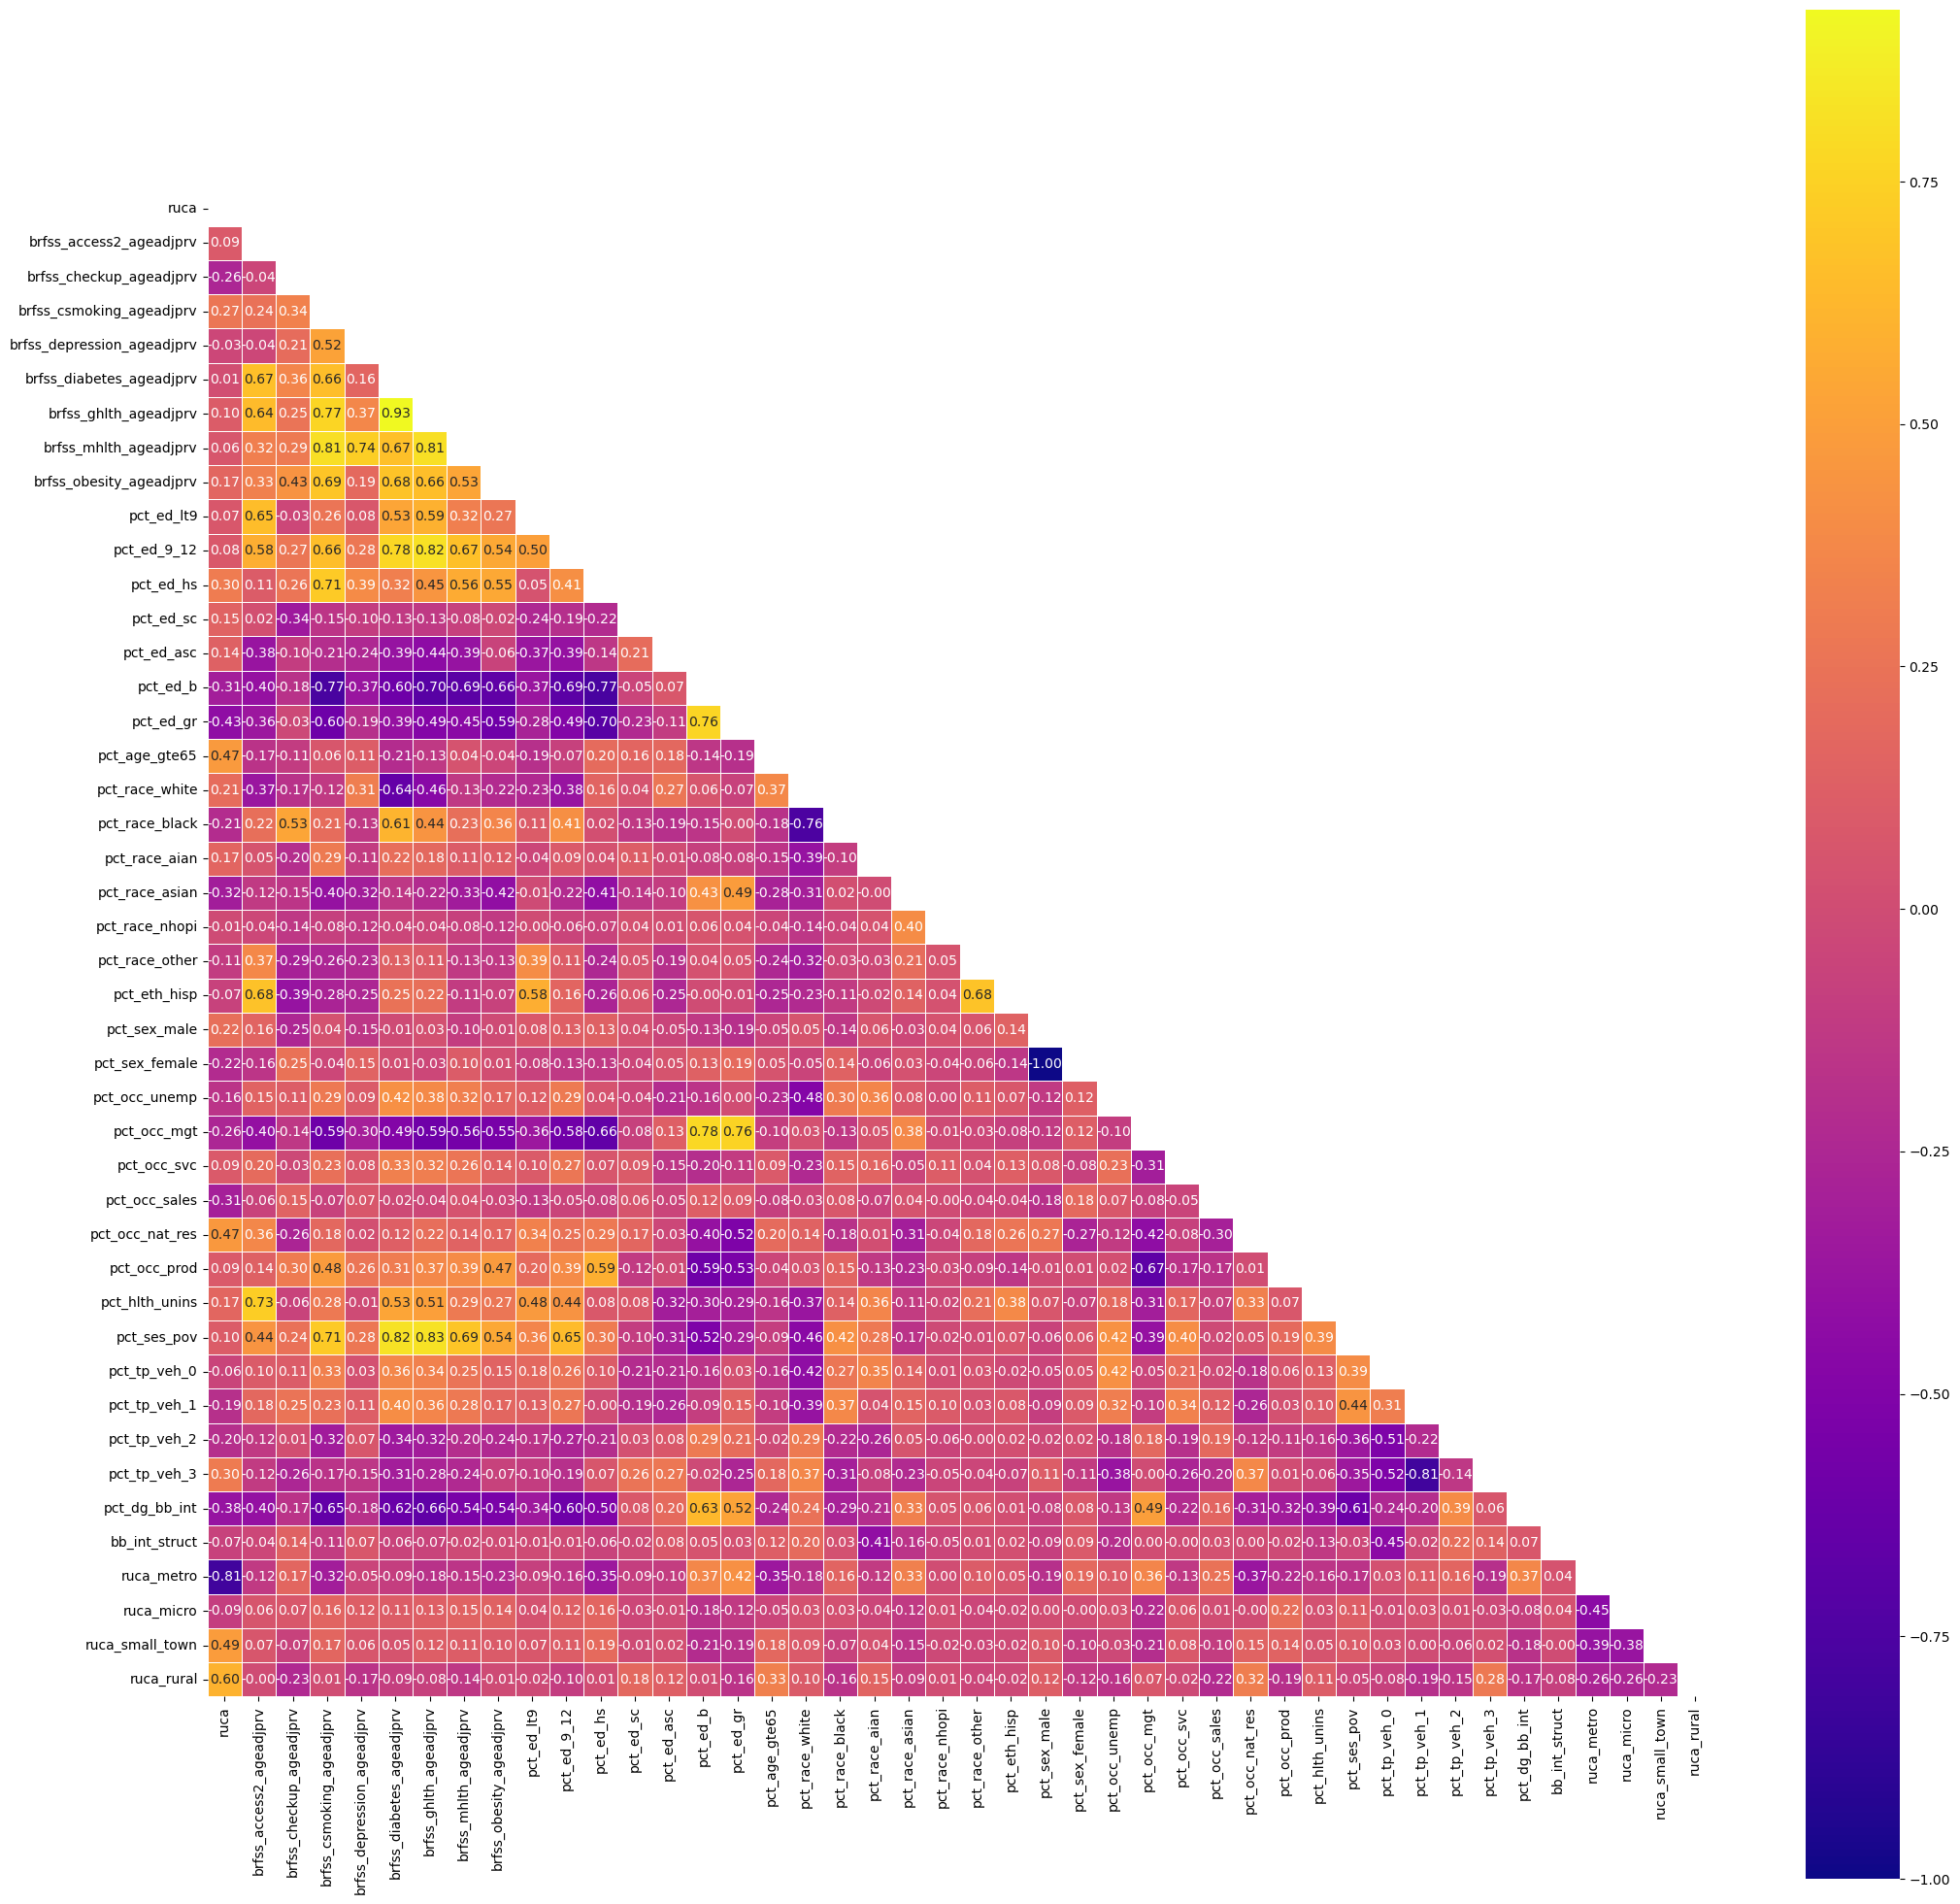

In [12]:
corr = df[features].corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25, 25))
sns.heatmap(corr, mask=mask, annot=True, square=True, cmap='plasma', fmt='.2f', linewidths=0.5)
plt.show()



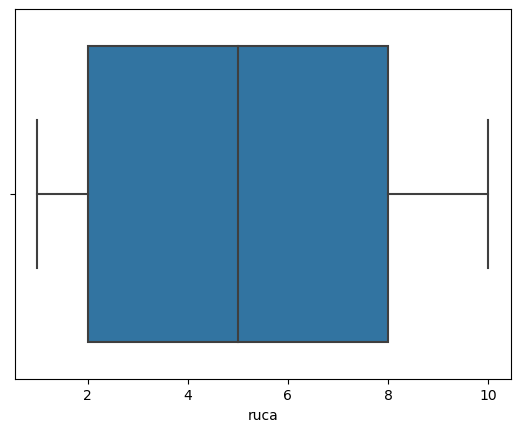

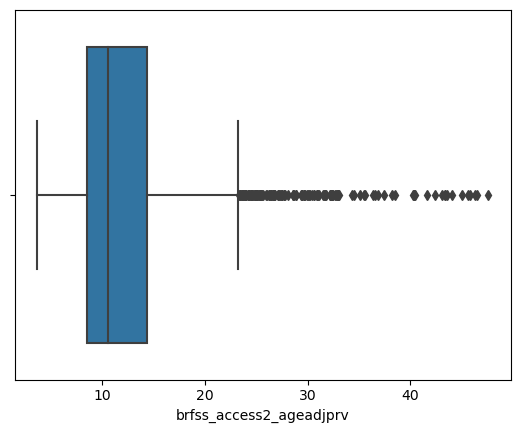

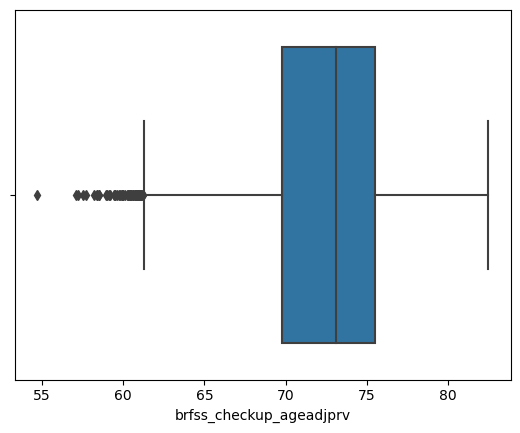

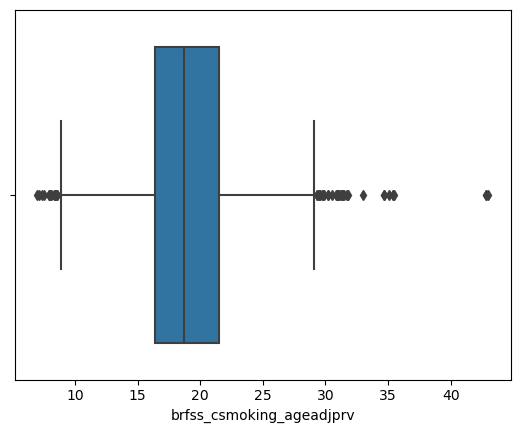

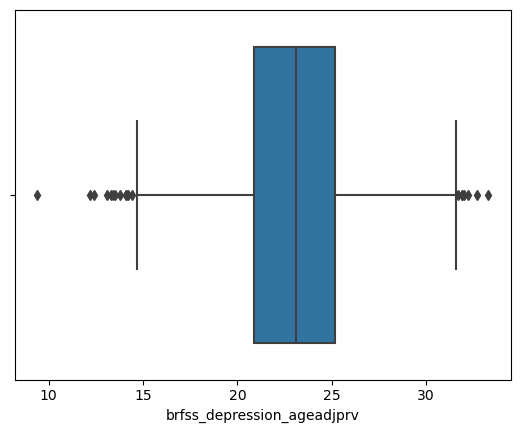

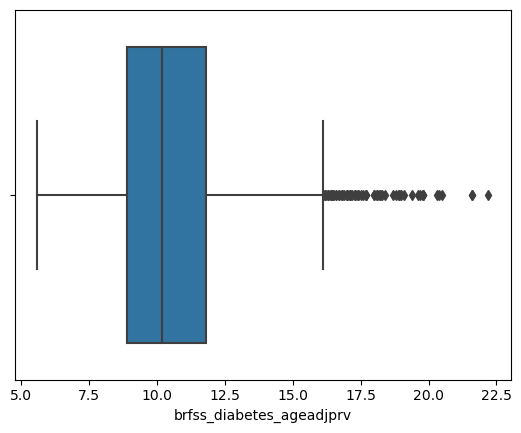

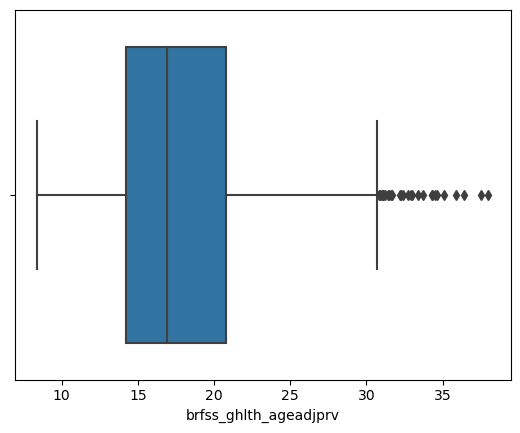

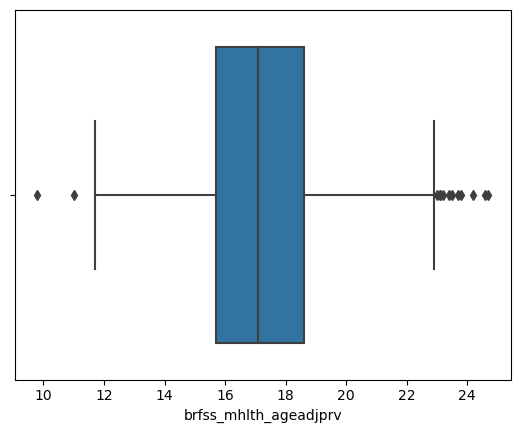

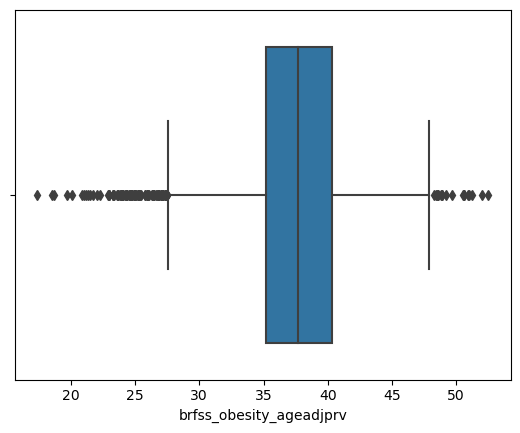

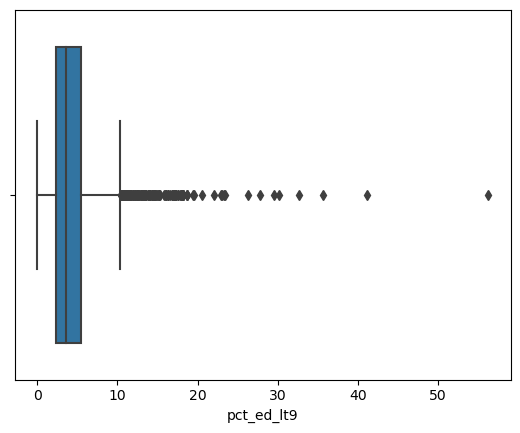

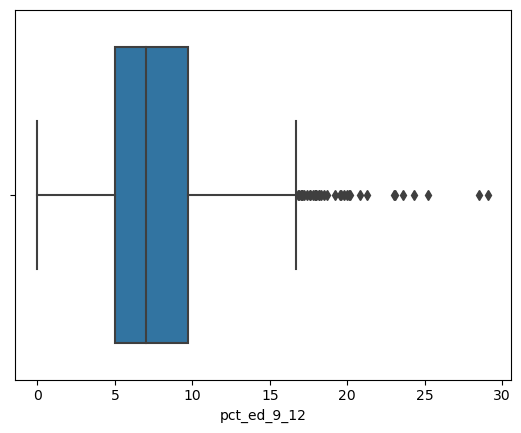

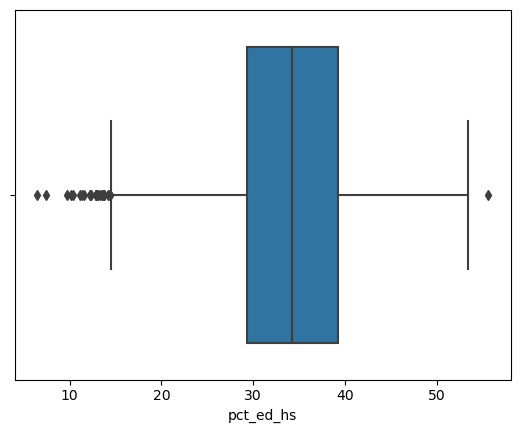

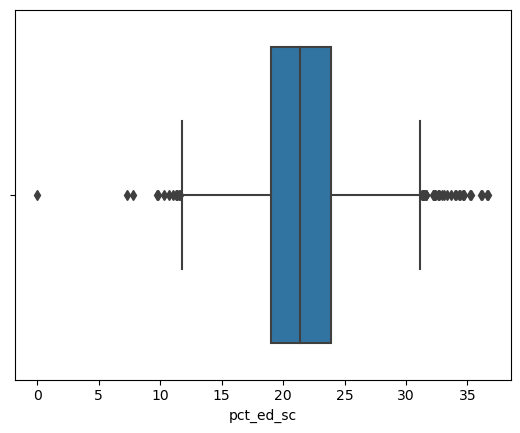

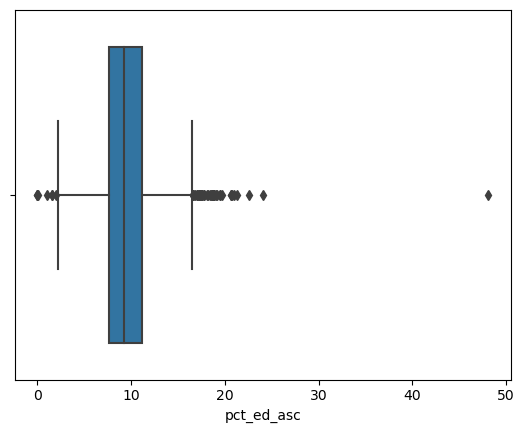

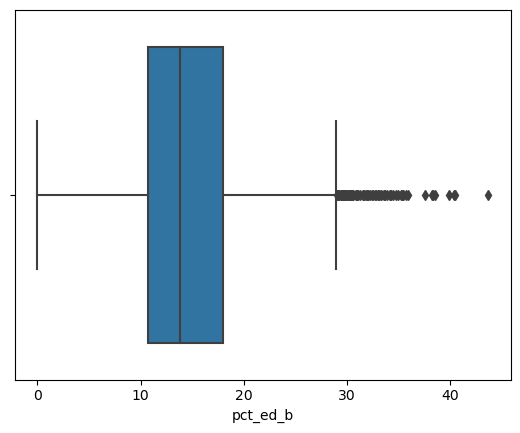

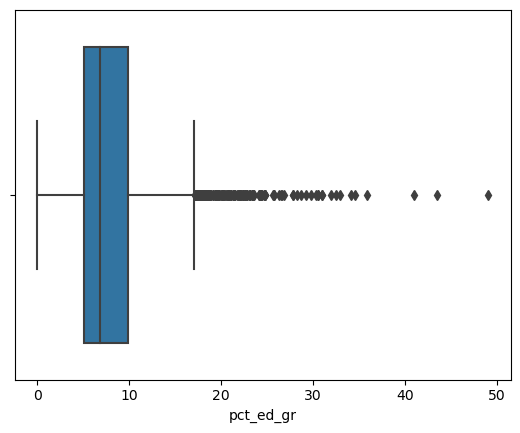

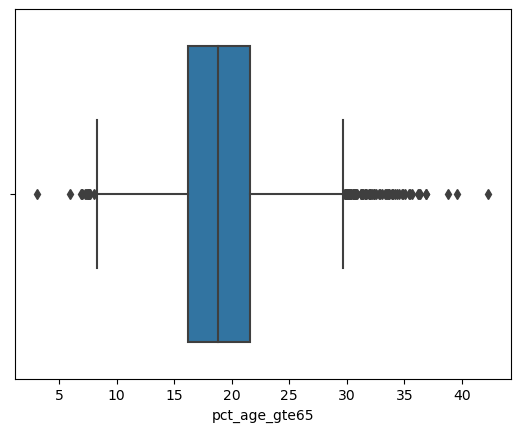

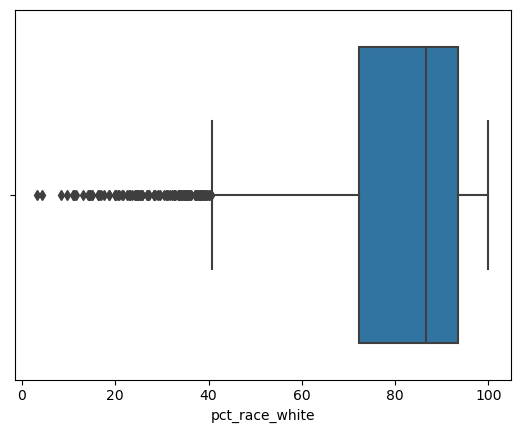

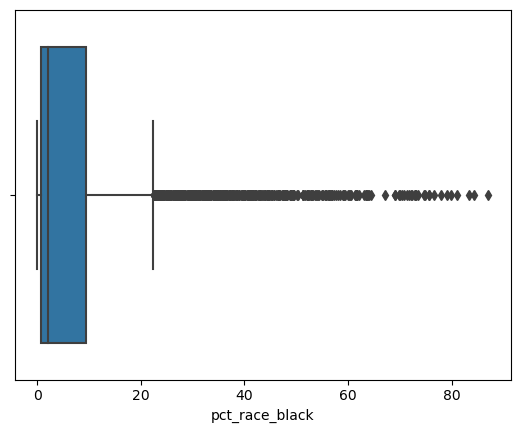

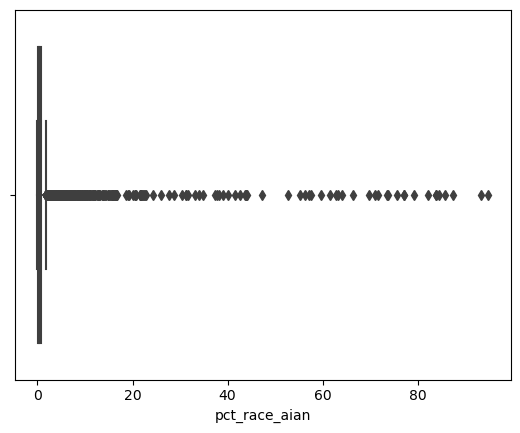

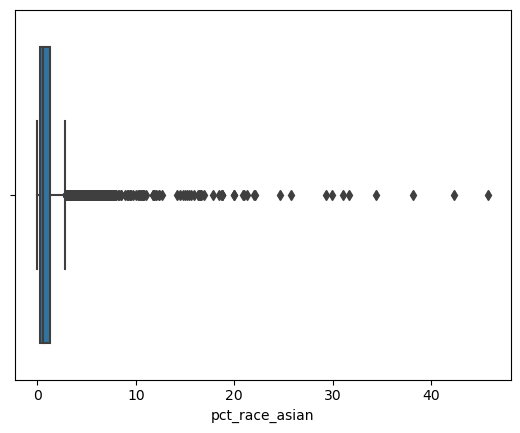

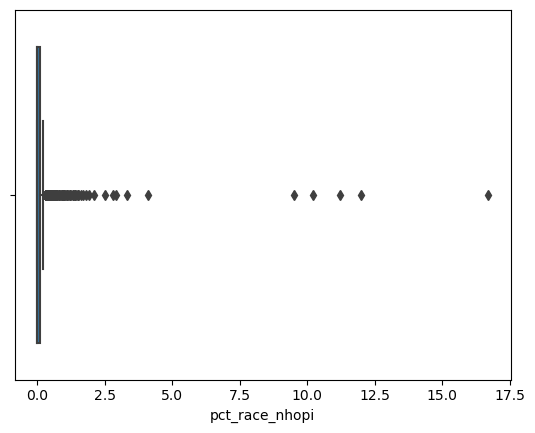

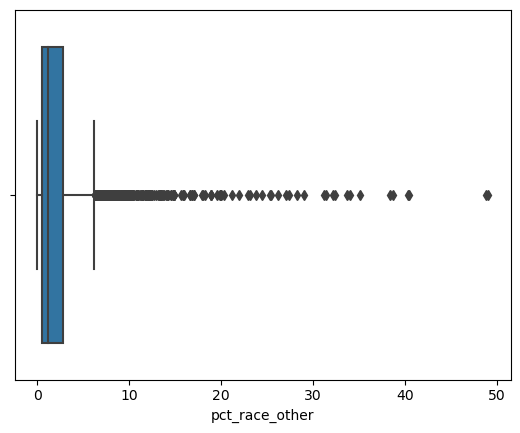

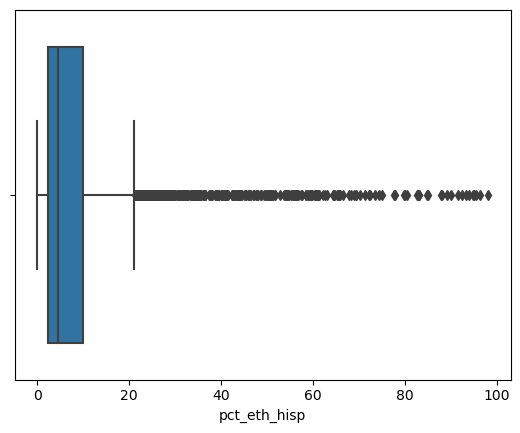

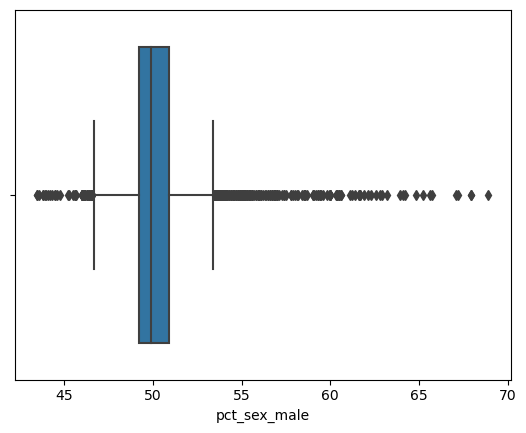

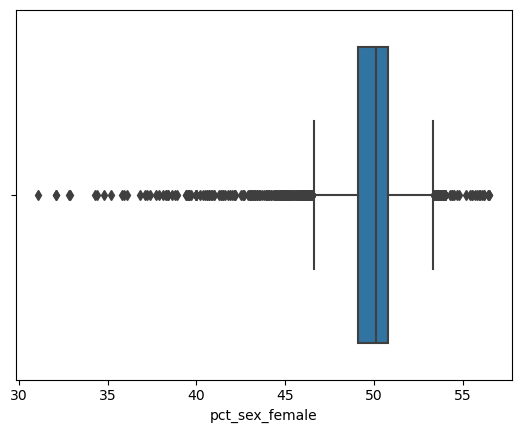

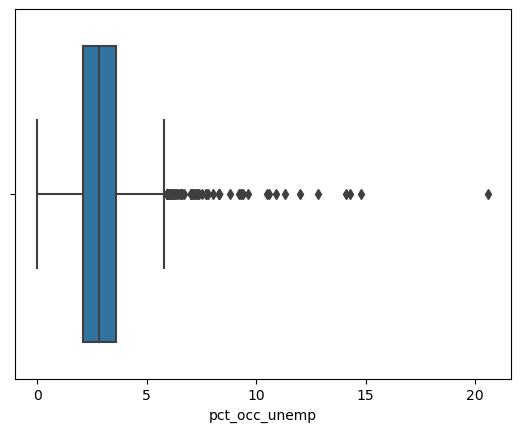

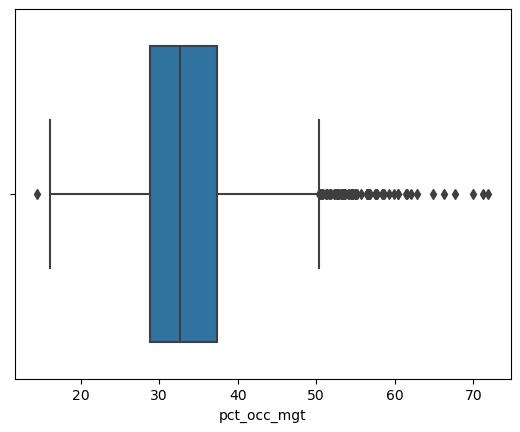

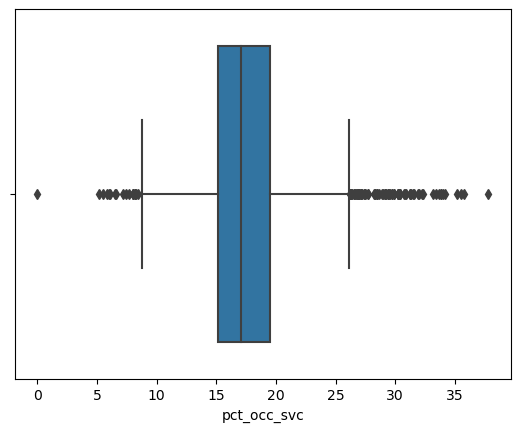

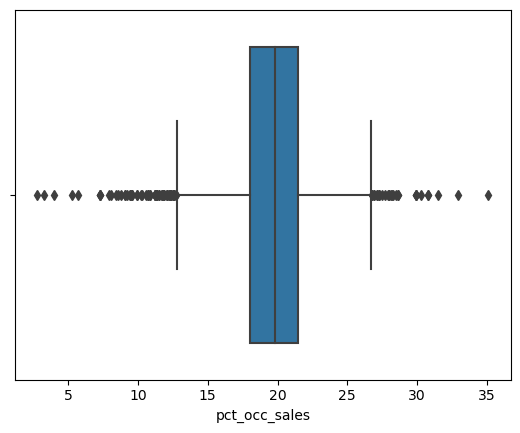

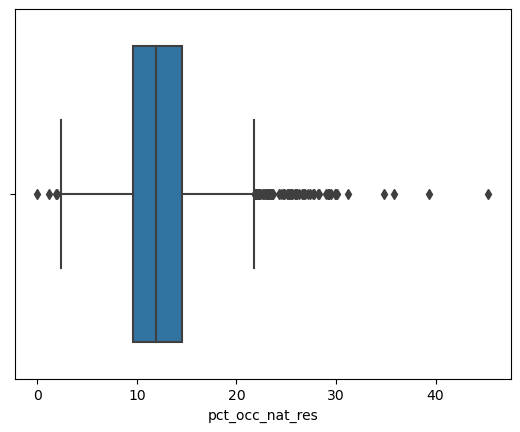

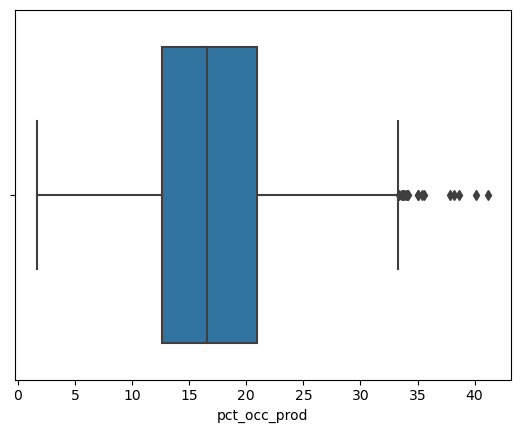

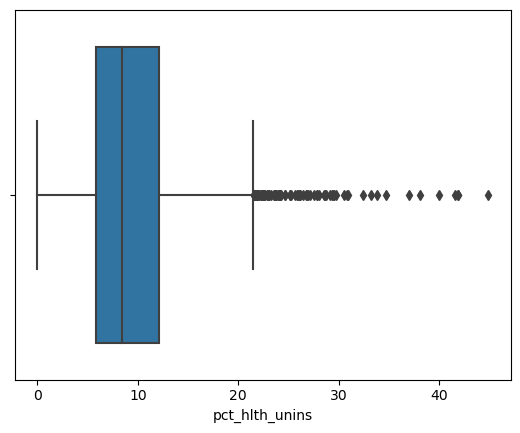

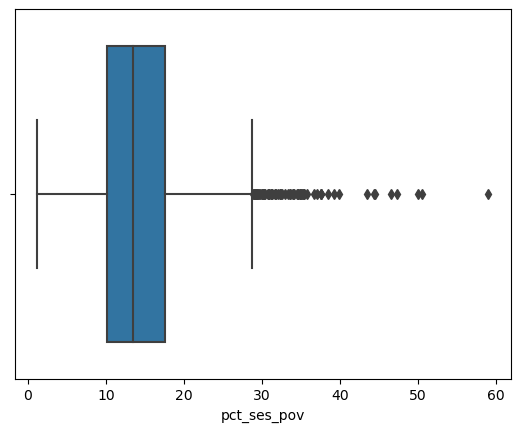

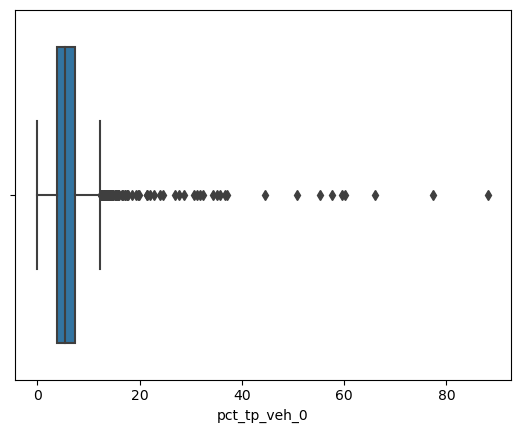

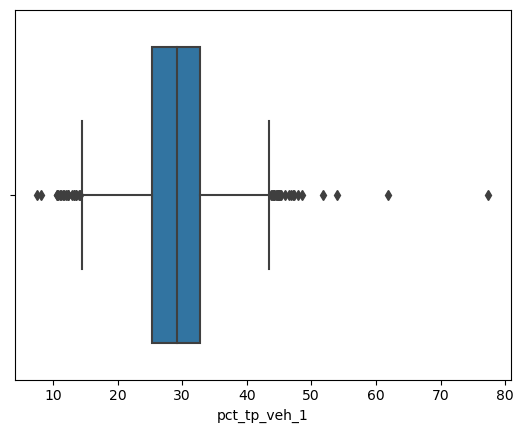

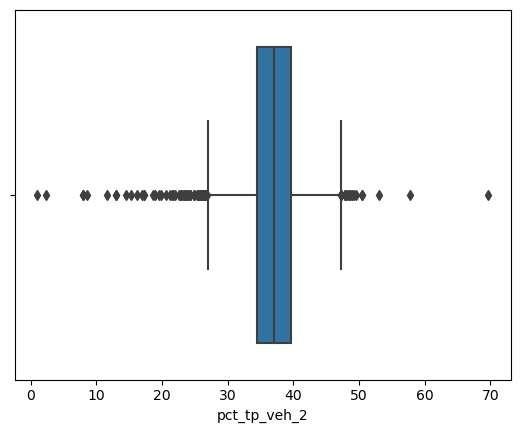

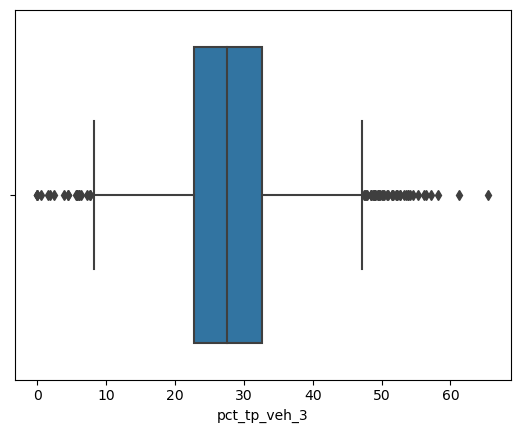

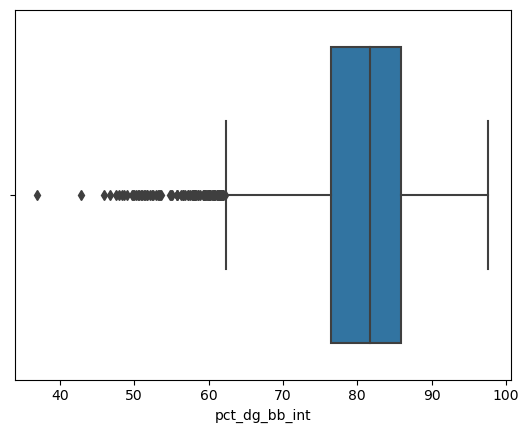

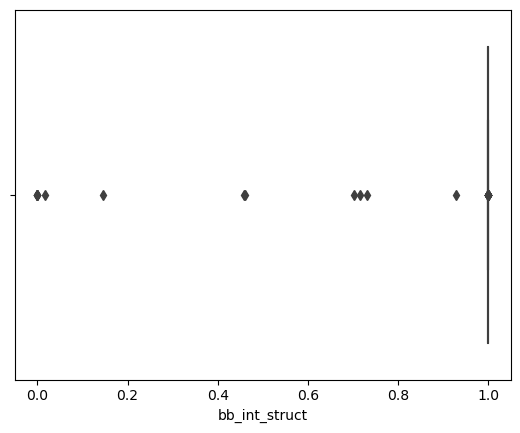

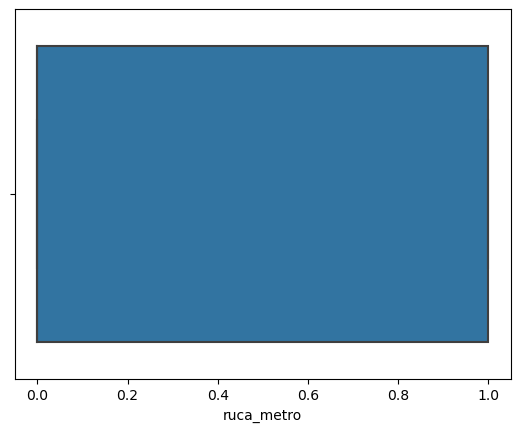

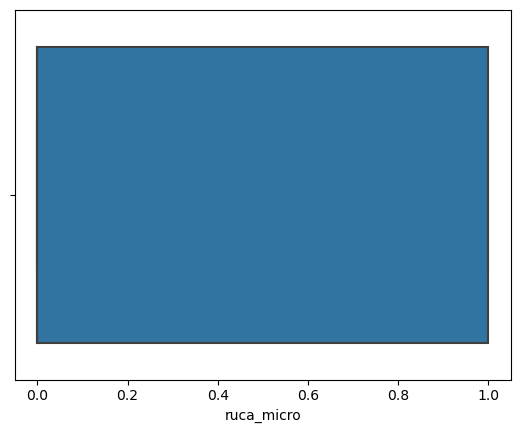

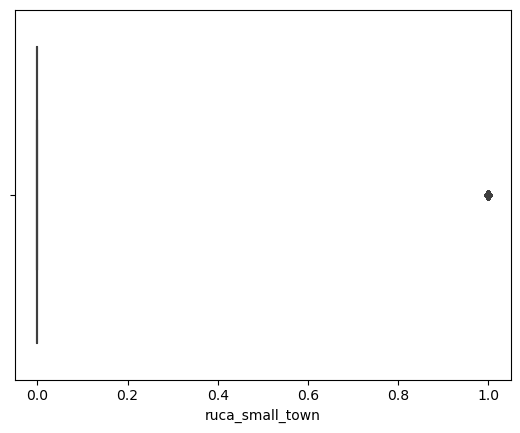

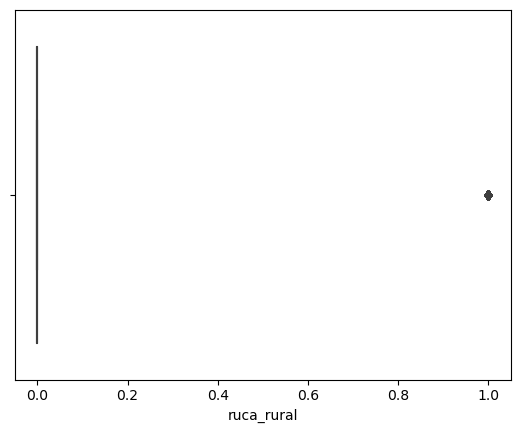

In [13]:
for i in df[features]:
    sns.boxplot(x=df[i])
    plt.show()

# Bivariate Correlation Analysis : Diabetes 

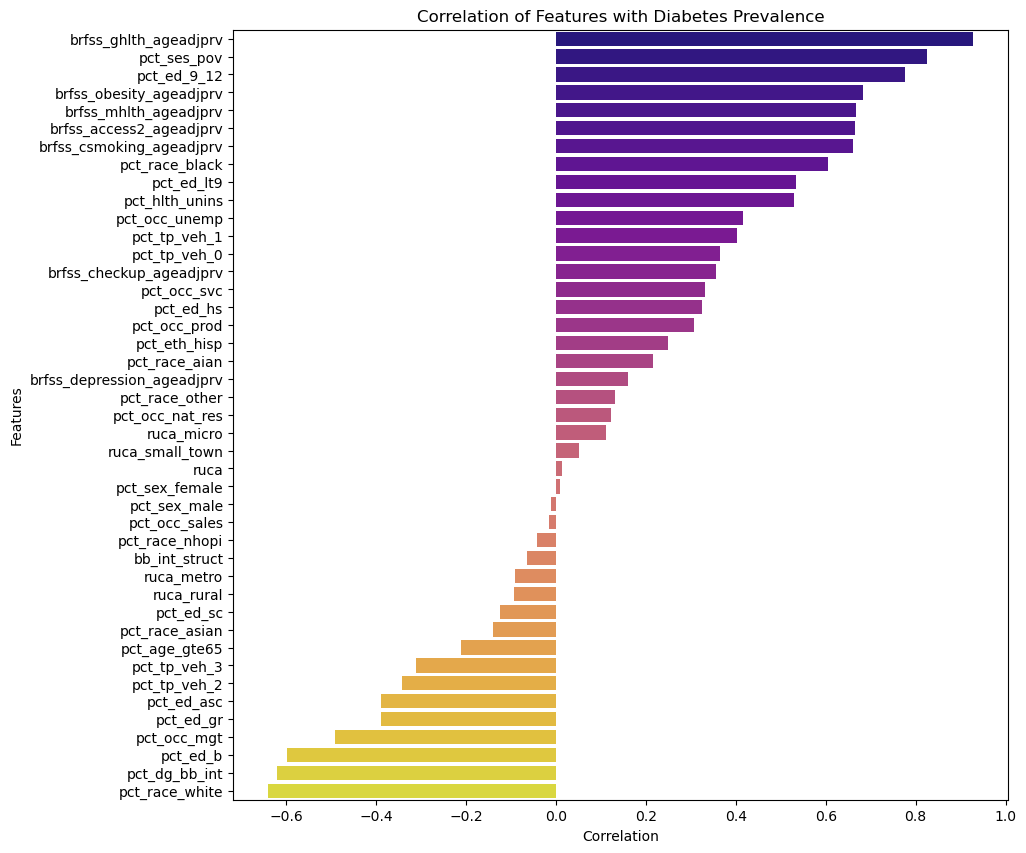

In [14]:
corr = df[features].corr()
target = 'brfss_diabetes_ageadjprv'
corr_target = corr[target]
corr_target = corr_target.sort_values(ascending=False)
#drop diabetes from corr_target
corr_target = corr_target.drop(['brfss_diabetes_ageadjprv'])
#barplot plasma gradient
plt.figure(figsize=(10, 10))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='plasma')
plt.title('Correlation of Features with Diabetes Prevalence')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [15]:
df['ruca'].value_counts()
#round to nearest integer
df['ruca'] = df['ruca'].round(0).astype(int)

### RUCA Code Dictionary 1-10
1. Metropolitan Area Core: Primary flow within an urbanized area (UA) of 50,000 or more population, or primary flow to a small UA (population less than 50,000) from a surrounding urban cluster of at least 10,000 population.
2. Metropolitan Area High Commuting: Primary flow 30% or more to a UA of 50,000 or more population, or primary flow 30% or more to a small UA (population less than 50,000) from a surrounding urban cluster of at least 10,000 population.
3. Metropolitan Area Low Commuting: Primary flow less than 30% to a UA of 50,000 or more population, or primary flow less than 30% to a small UA (population less than 50,000) from a surrounding urban cluster of at least 10,000 population.
4. Micropolitan Area Core: Primary flow within an urban cluster of at least 10,000 population, but less than 50,000 population.
5. Micropolitan Area High Commuting: Primary flow 30% or more to an urban cluster of at least 10,000 population, but less than 50,000 population.
6. Micropolitan Area Low Commuting: Primary flow less than 30% to an urban cluster of at least 10,000 population, but less than 50,000 population.
7. Small Town Core: Primary flow within an urban cluster of at least 2,500 population and less than 10,000 population.
8. Small Town High Commuting: Primary flow 30% or more to an urban cluster of at least 2,500 population and less than 10,000 population.
9. Small Town Low Commuting: Primary flow less than 30% to an urban cluster of at least 2,500 population and less than 10,000 population.
10. Rural: Primary flow to a tract outside a UA or urban cluster.


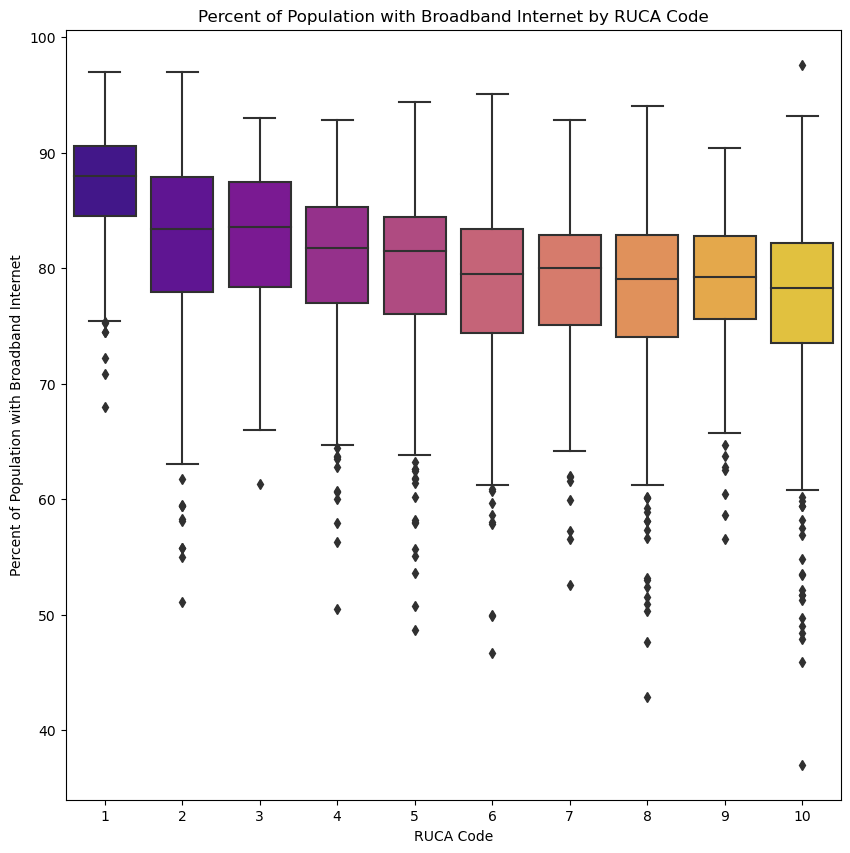

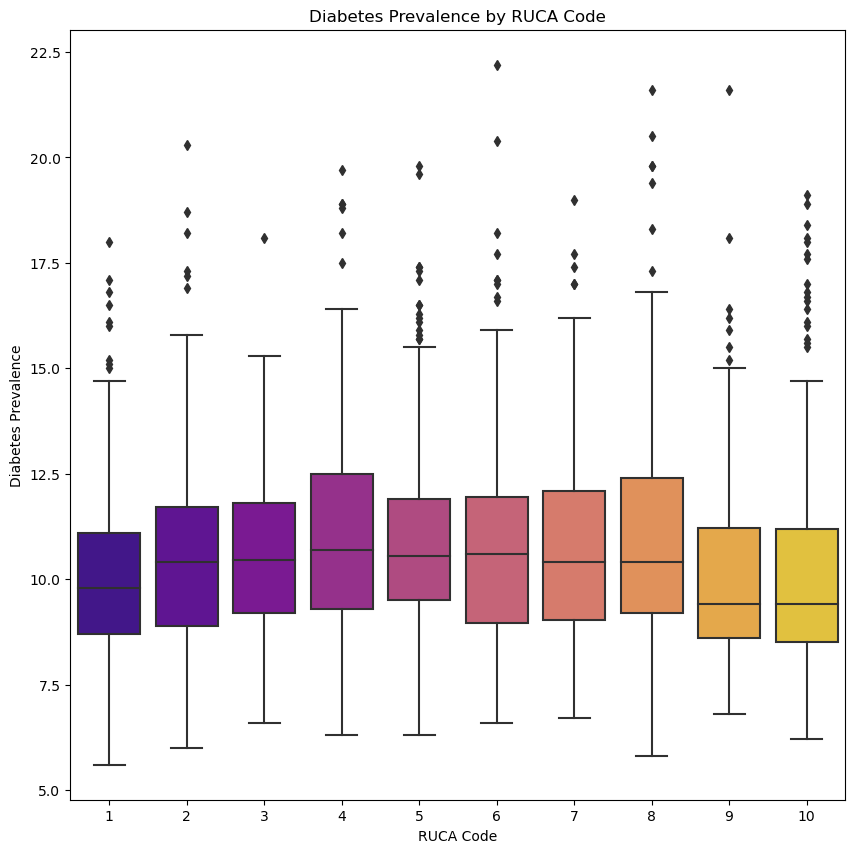

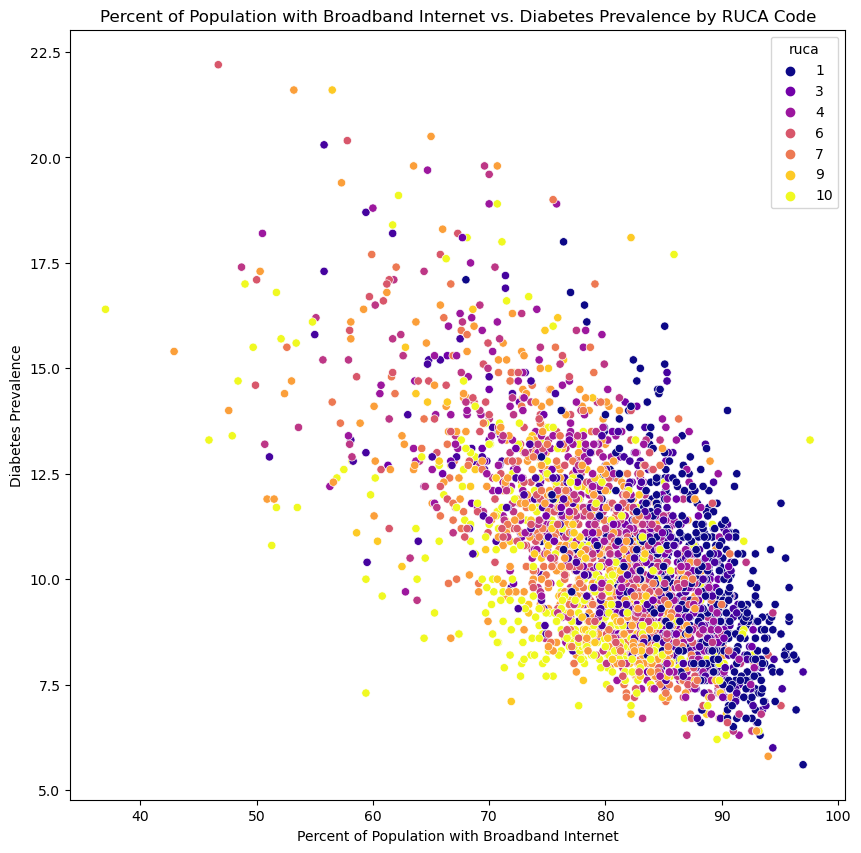

In [16]:
# pct_dg_bb_int by RUCA code boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['ruca'], y=df['pct_dg_bb_int'], palette='plasma')
plt.title('Percent of Population with Broadband Internet by RUCA Code')
plt.xlabel('RUCA Code')
plt.ylabel('Percent of Population with Broadband Internet')
plt.show()

# brfss_diabetes_ageadjprv by RUCA code boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['ruca'], y=df['brfss_diabetes_ageadjprv'], palette='plasma')
plt.title('Diabetes Prevalence by RUCA Code')
plt.xlabel('RUCA Code')
plt.ylabel('Diabetes Prevalence')
plt.show()


#scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['pct_dg_bb_int'], y=df['brfss_diabetes_ageadjprv'], hue=df['ruca'], palette='plasma')
plt.title('Percent of Population with Broadband Internet vs. Diabetes Prevalence by RUCA Code')
plt.xlabel('Percent of Population with Broadband Internet')
plt.ylabel('Diabetes Prevalence')
plt.show()


## Key Insight
1. Diabetes prevalence is highly correlated with general health. Due to the linear relationship, RQ 2 will be dropped. 

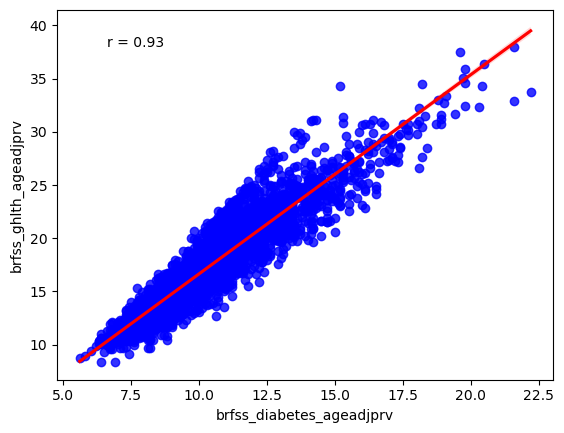

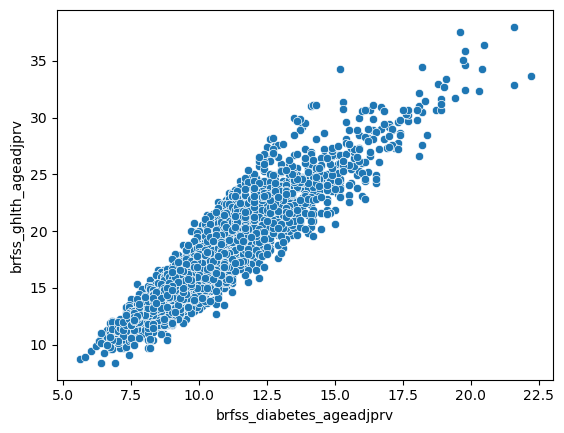

In [17]:
sns.regplot(data=df, x="brfss_diabetes_ageadjprv", y="brfss_ghlth_ageadjprv", line_kws={"color": "red"}, scatter_kws={"color": "blue"}, ci=95)
plt.text(0.1, 0.9, f"r = {round(df['brfss_diabetes_ageadjprv'].corr(df['brfss_ghlth_ageadjprv']), 2)}", transform=plt.gca().transAxes)
plt.show()
sns.scatterplot(data=df, x="brfss_diabetes_ageadjprv", y="brfss_ghlth_ageadjprv")
plt.show()